In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from Bio import AlignIO
import seaborn as sns
import re

In [3]:
import matplotlib 
# For higher resoltion figures
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rcParams["font.family"] = "Helvetica" #somethings this one doesnt work
plt.rcParams['pdf.fonttype'] = 42

In [4]:
colors = ["red", 'blue', 'green']

In [5]:
# Read in data
data = pd.read_pickle("../data/FullOrthologDF_20240930")
data

,SpeciesName,Seq,Length,WxxLF_loc,SmoothedActivites,LinearCharge,LinearHydrophobicityKD,SmoothedActivitesLoess
0,Sordariomycetes_jgi|Acral2|2019554|gm1.4974_g,MALRIEVYNRIESSTASTALQRQDLRYTFRSNARAASGQANANYQA...,2928,1006,"[50849.75653537431, 50849.75653537431, 50849.7...","[0.0, 0.0, 0.2, 0.0, 0.0, 0.0, -0.2, 0.0, 0.2,...","[0.0, 0.0, 0.6666666666666666, 0.5466666666666...","[34049.34344014826, 34049.34344014826, 34049.3..."
1,Sordariomycetes_jgi|Acral2|2027520|fgenesh1_pg...,MWLVVRAGPSPLLQDLAARCHIDGMSMPLLHFDPPDFPLTGVALGI...,455,327,"[50311.68363475637, 50311.68363475637, 50311.6...","[0.0, 0.0, 0.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.0, ...","[0.0, 0.0, 0.7933333333333333, 0.6511111111111...","[58366.833469168625, 58366.833469168625, 58366..."
2,Sordariomycetes_jgi|Acral2|2034848|fgenesh1_kg...,MSITELDDFTGFEGGASTAYSSPGAPAVFDLPGASNHVGTISPQDL...,222,94,"[64062.654182288825, 64062.654182288825, 75414...","[0.0, 0.0, -0.2, -0.2, -0.4, -0.6, -0.6, -0.4,...","[0.0, 0.0, 0.5311111111111111, 0.5733333333333...","[36846.26635132608, 36846.26635132608, 36846.2..."
3,Sordariomycetes_jgi|Acral2|2034849|fgenesh1_kg...,MSITGNYNQHFGAAGIISSHNYVLSELDDFTGFEGGASTAYSSPGA...,243,115,"[103421.45065118768, 103421.45065118768, 10342...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.6, 0.48, 0.4688888888888889, 0.29...","[98417.43715391349, 98417.43715391349, 98417.4..."
5,Sordariomycetes_jgi|Acral2|2047914|estExt_Gene...,MADTCGGSTPLKNFSQYGSQDRSLQQDRVVHGFHGSAAAGPSTFRS...,2943,1021,"[49761.33963354764, 49761.33963354764, 49761.3...","[0.0, 0.0, -0.2, -0.2, -0.2, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.5444444444444445, 0.4933333333333...","[36959.46539862907, 36959.46539862907, 36959.4..."
...,...,...,...,...,...,...,...,...
1207,Cimm_XP_012214147.1_CoccidioidesImmitisRS,MSTSNLPLDIGTLLDLSTDQFVEDLGSSSHSSLLDQDQLDQLINFN...,242,108,"[179044.502422884, 179044.502422884, 179044.50...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.2, -0.2, -0....","[0.0, 0.0, 0.4133333333333334, 0.4555555555555...","[215199.18805174268, 215199.18805174268, 21519..."
1208,Cpos_XP_003070205.1_CoccidioidesPosadasiiC735,MSTSNLPLGMVSLSASAVRLVANQRPDIGTLLDLSTDQYVEDLGSS...,260,126,"[56309.23879651313, 56309.23879651313, 56309.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.4133333333333334, 0.4555555555555...","[6138.0, 6138.0, 6138.0, 6138.0, 6138.0, 6138...."
1209,Mory_EHA48851.1_MagnaportheOryzae70_15,MNNTSDLGLDDFTAFGGGASAFPSPAMPGVFDIASTTASTMGTVSP...,239,101,"[165405.40017749005, 165405.40017749005, 16540...","[0.0, 0.0, 0.0, -0.2, -0.2, -0.2, -0.2, -0.4, ...","[0.0, 0.0, 0.3533333333333334, 0.2333333333333...","[156903.4915015713, 156903.4915015713, 156903...."
1210,Nfis_EAW24893.1_NeosartoryaFischeriNRRL181,MSTPNIAQDMPDFFGLPSNDFGDDFELSTEPTMLSPNQIPTGLMAV...,251,109,"[148604.20780984958, 148604.20780984958, 14860...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.2, -0.2, -0....","[0.0, 0.0, 0.39555555555555555, 0.453333333333...","[177960.75802414527, 177960.75802414527, 17796..."


In [ ]:
# Pairs of closely related sequences that may have interesting differences in N-terminal ADs
# Not used in downstream code but was used before

names = ["Leotiomycetes_jgi|Amore1|104599|e_gw1.8.212.1", # no N-term AD
"Leotiomycetes_jgi|Amore1|20362|gm1.6031_g" ]# Yes N-term AD

names = [
    "Leotiomycetes_jgi|Lepor2|669630|gm1.6110_g",
    'Leotiomycetes_jgi|Cadsp1|348442|gw1.11.1.1'
]

names = [
"Leotiomycetes_jgi|Melbi2|567588|estExt_Genewise1.C_124_t10015", 
"Leotiomycetes_jgi|Hymvar1|347718|gw1.15.548.1"

]

names = [
    "Orbiliomycetes_tr|S8AP85|S8AP85_DACHA", 
    "Pezizomycetes_jgi|Ascim1|93291|CE93290_30315"

]

names = [
    'Saccharomycotina_jgi|Canar1|226940|estExt_Genewise1.C_260001',
    "Saccharomycotina_jgi|Hanpo2|10524|gm1.4782_g"
]

# This one was cool example
names = [
    'Dothideomycetes_jgi|Didsa1|357396|e_gw1.21.66.1',
    'Dothideomycetes_jgi|Denna1|471682|estExt_Genewise1.C_17_t20010'
]

# Confusing --> Need to investigate 
names = [
'Sordariomycetes_jgi|Bisma1|428522|MIX5565_237310_87', 
'Sordariomycetes_jgi|KdCBS826_1|635101|MIX5102_360246_86'
]

names = [
    "Eurotiomycetes_jgi|Asptam1|301894|gm1.7538_g",
    "Eurotiomycetes_jgi|Aspwest1|288260|MIX3385_40392_79"
]

# names = [
#     'Dothideomycetes_jgi|Ophdi1|450984|estExt_fgenesh1_pg.C_1_t10370',
#     'Dothideomycetes_jgi|Epini1|455912|estExt_fgenesh1_pg.C_60157'

# ]

names = [
    "Sbay_sbayc645_g44.1",
    "Skud_5.91"
]

In [11]:
name_key = pd.read_csv("../data/phylogenetic_info/top138_phyloinfo.csv")
name_key["name"]

0                                        Calb_orf19.1358
1                                    Sbay_sbayc645_g44.1
2                                      Spar_spar361_g1.1
3                                      Smik_smik283_g1.1
4                                              Skud_5.91
                             ...                        
497    Leotiomycetes_jgi|Amore1|123696|estExt_Genewis...
498    Leotiomycetes_jgi|Amore1|29065|fgenesh1_pg.8_#...
499    Leotiomycetes_jgi|Amore1|51693|fgenesh1_pm.8_#...
500           Leotiomycetes_jgi|Amore1|73911|gw1.8.212.1
501           Leotiomycetes_jgi|Amore1|79871|gw1.8.585.1
Name: name, Length: 502, dtype: object

In [6]:
ActivityThresh=  94031

In [7]:
def make_activity_trace_plot(filtered, s):
    """
    Function to plot the smoothed activity. 
    s is location to start the threshold, relative to the WLF motif (at zero)
    """

    # Make activity trace
    for idx, color in zip(filtered.index, colors):
        curr_seq = filtered.loc[idx, "Seq"]
        match = re.search("W..LF", curr_seq)
        start = match.start()
        length = len(filtered.loc[idx, "SmoothedActivitesLoess"])
        x_vals = range(-start, length - start)
        
        # Gets the species name
        label = name_key[name_key["name"] == filtered.loc[idx, "SpeciesName"]]['SpeciesName']
        plt.plot(x_vals, filtered.loc[idx, "SmoothedActivitesLoess"], label = label, color = color)
    
    plt.hlines(ActivityThresh, xmin=s, xmax=length-start, color='grey', linestyle='--')

    plt.legend(fontsize=10, loc='upper right', bbox_to_anchor=(1.3, 0.5, 0.5, 0.5))

    plt.xlabel("Location relative to WxxLF motif")
    plt.ylabel("Activity")
    sns.despine()
    
    # plt.savefig(f"{outdir}/activity_trace.pdf")
    # plt.savefig(f"{outdir}/activity_trace.png")

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


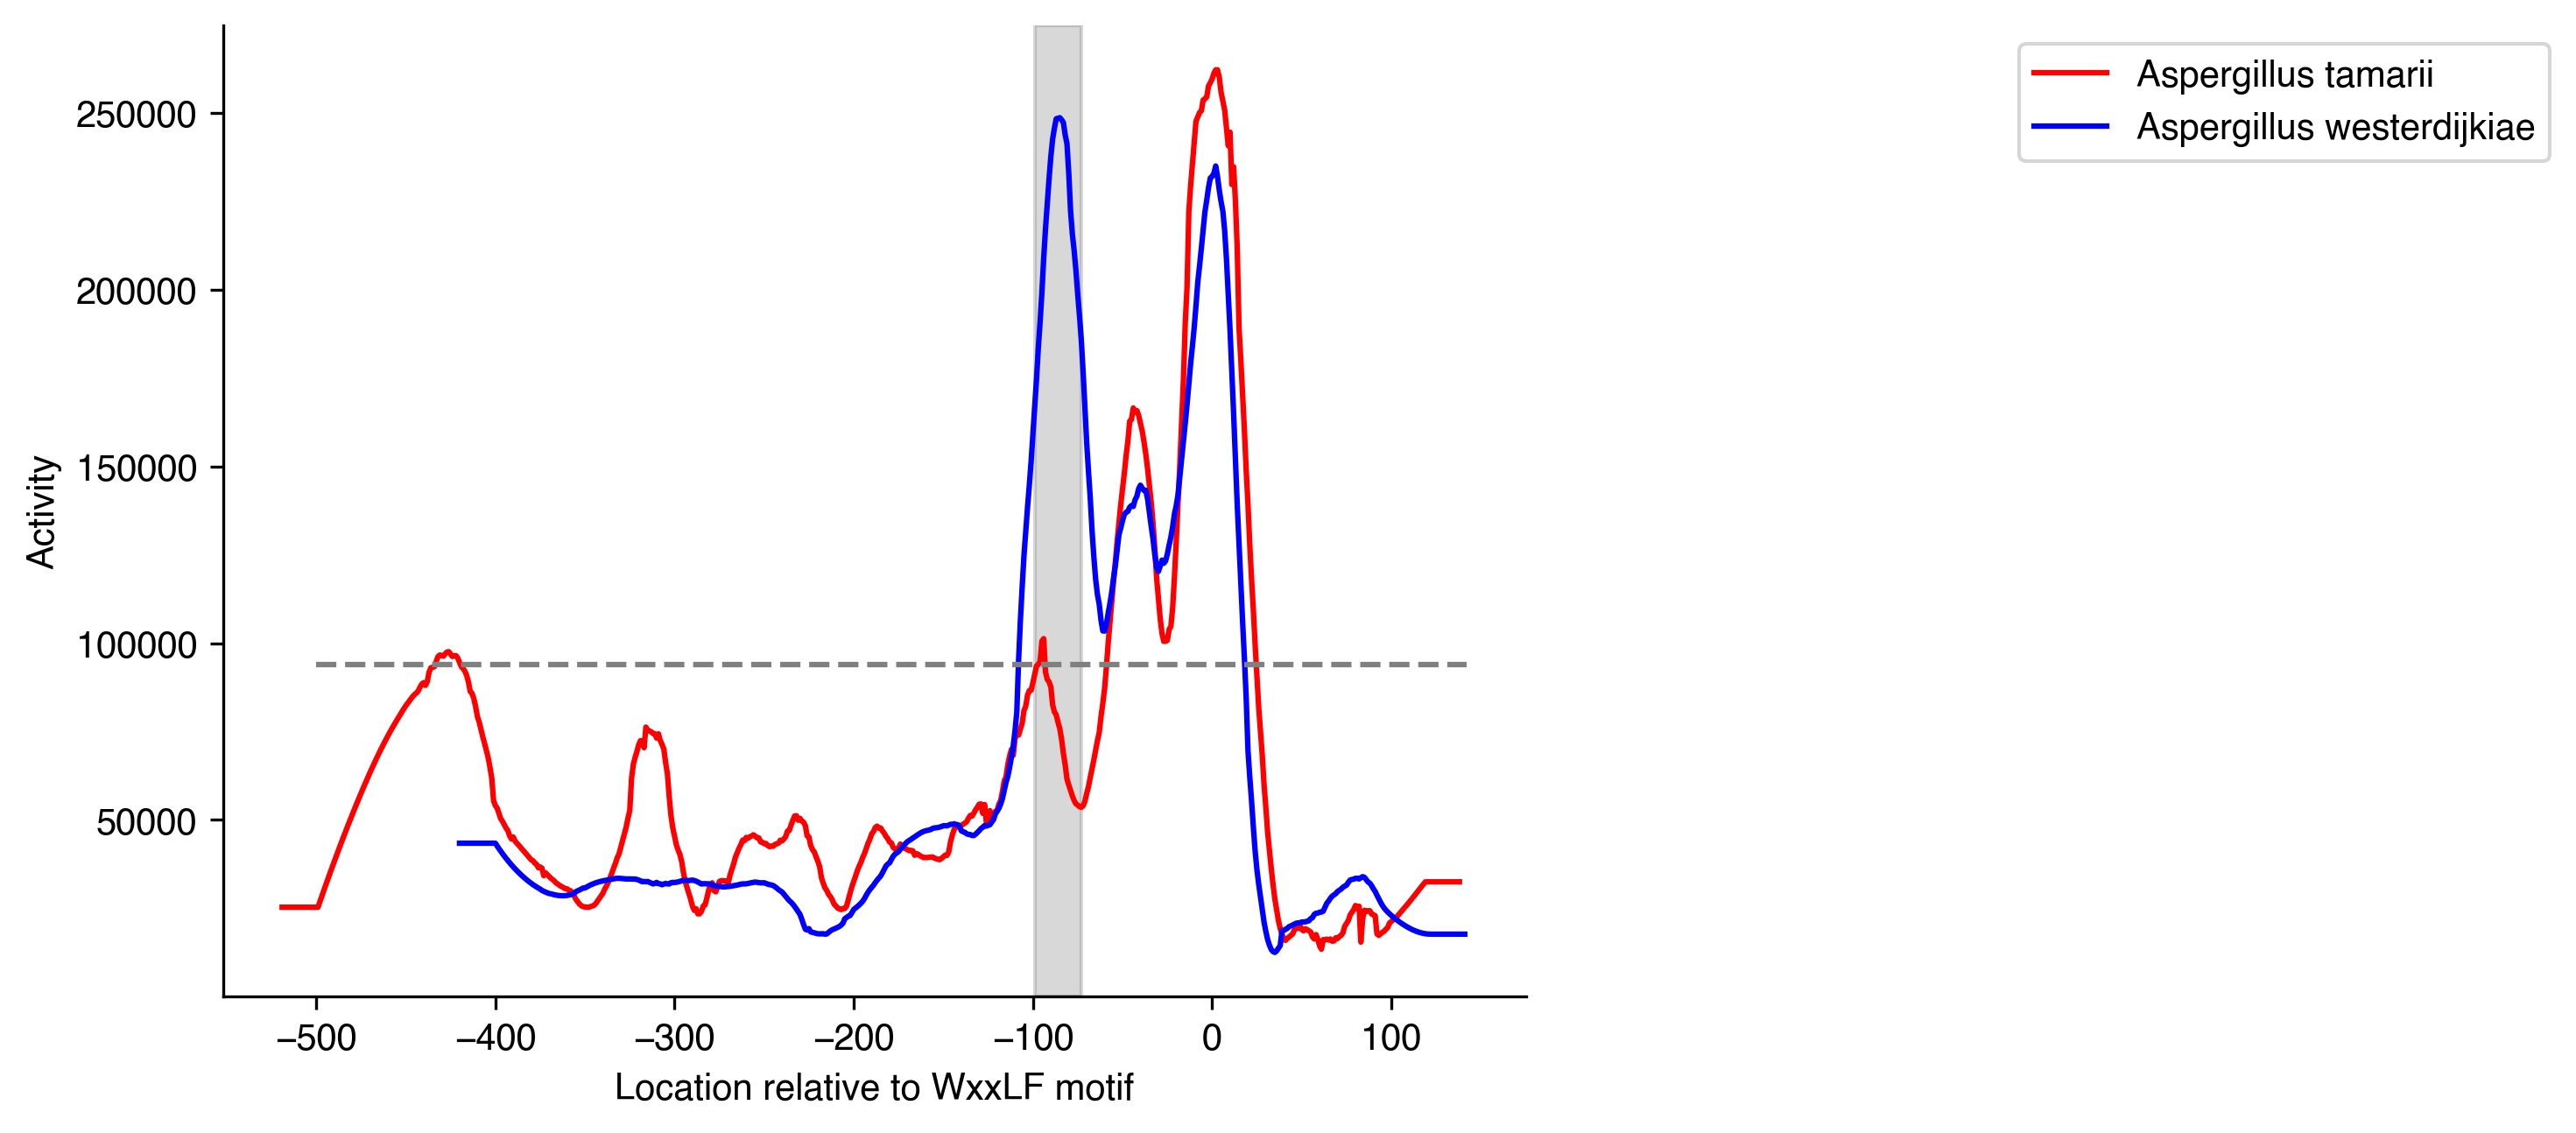

In [ ]:
names = [
    'Eurotiomycetes_jgi|Aspwest1|288260|MIX3385_40392_79',
    'Eurotiomycetes_jgi|Asptam1|301894|gm1.7538_g'
]

# Plots traces for the two sequences of interest
filtered = data[[name in names for name in data["SpeciesName"]]]
colors = ['red', 'blue']
make_activity_trace_plot(filtered, s=-500)

axs = plt.gca() 

# Searches for the differeing sequence and highlights it in grey
match = re.search("PVDLPDLFDFSTDQFGADFDLSMLSP", filtered.loc[109, "Seq"])
start = match.start() - re.search("W..LF", filtered.loc[109, "Seq"]).start()
end = match.end() - re.search("W..LF", filtered.loc[109, "Seq"]).start()

axs.axvspan(start, end, ymin=0, ymax=1, color='grey', alpha=0.3)

plt.savefig(f"../comparisons/Asptam_Aspwest/activity_trace.pdf", format='pdf', bbox_inches='tight')

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


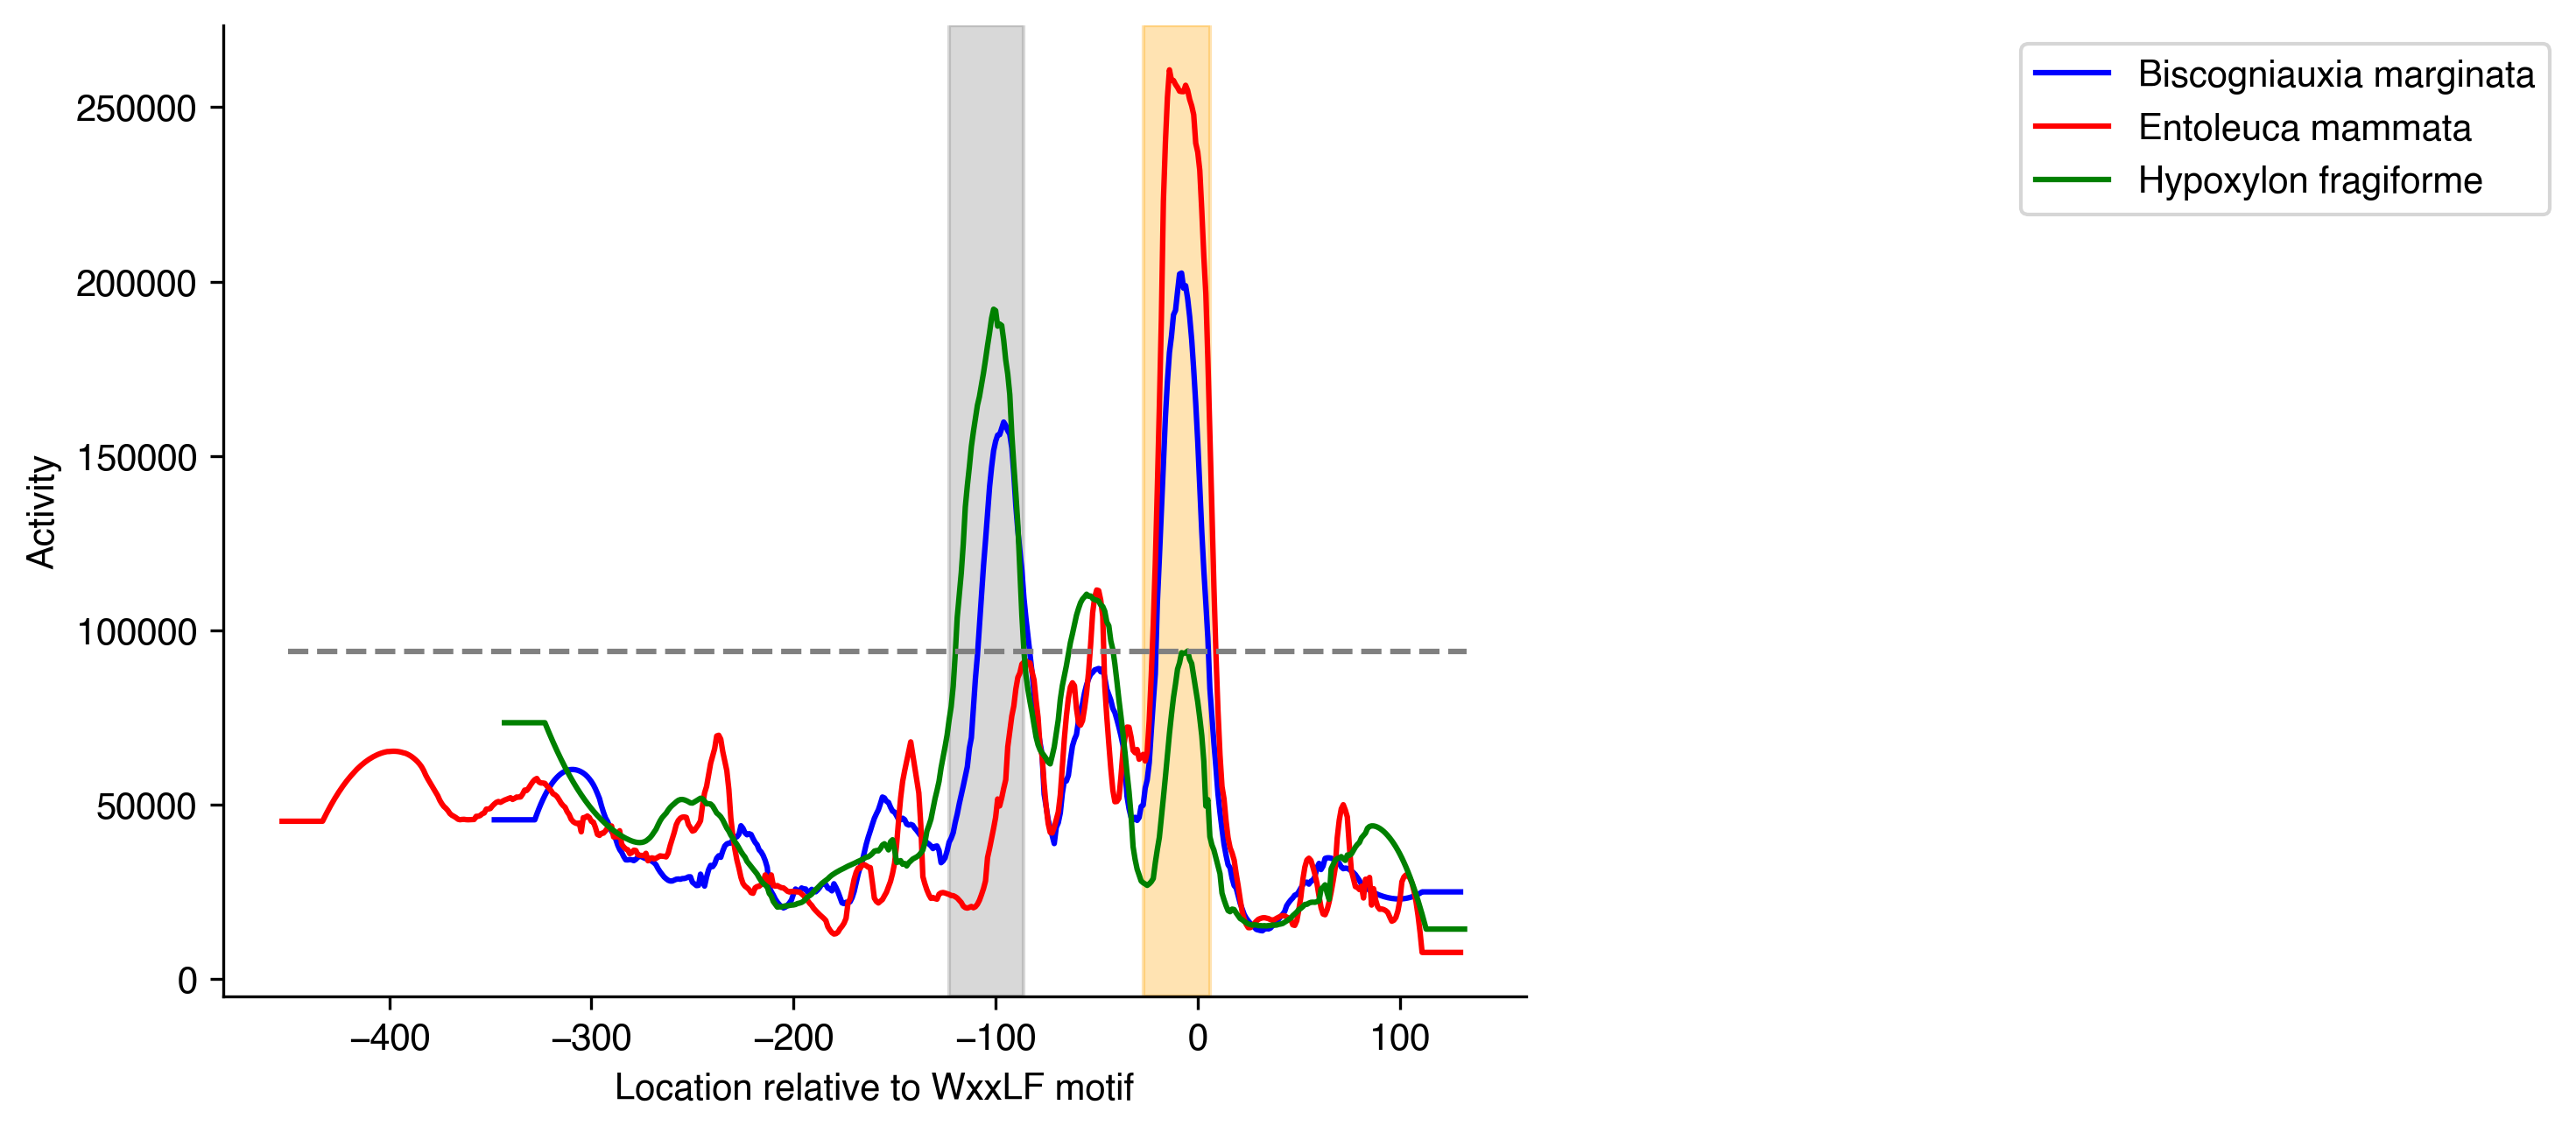

In [36]:
# Makes plot for another interesting set of sequences
names = [
# 'Sordariomycetes_jgi|KdCBS826_1|635101|MIX5102_360246_86',
'Sordariomycetes_jgi|Bisma1|428522|MIX5565_237310_87', 
'Sordariomycetes_jgi|Hypfra2|530715|MIX4042_126314_88',
# 'Sordariomycetes_jgi|Xylhel2|503237|fgenesh1_pm.7_#_186',
'Sordariomycetes_jgi|Entma1|346888|fgenesh1_pg.11_#_101'
]

filtered = data[[name in names for name in data["SpeciesName"]]]

# # Write to fasta
# with open("../data/N_term_AD_data/bisma_hypfra_entma.fasta", "w+") as f:
#     for index in filtered.index:
#         f.write(">" + filtered.loc[index, "SpeciesName"] + "\n")
#         f.write(filtered.loc[index, "Seq"] + "\n")

# ! mafft --auto "../data/N_term_AD_data/bisma_hypfra_entma.fasta" > "../data/N_term_AD_data/bisma_hypfra_entma_mafft.fasta"

colors = ['blue', 'red', 'green']
make_activity_trace_plot(filtered, -450)

axs = plt.gca() 

# Searches for the two interesting regions to highlight
match = re.search("MDLQGISTSTSLPSDSLISYIPDALSFEDFTPFEGGA", filtered.loc[535, "Seq"])
start = match.start() - re.search("W..LF", filtered.loc[535, "Seq"]).start()
end = match.end() - re.search("W..LF", filtered.loc[535, "Seq"]).start()

axs.axvspan(start, end, ymin=0, ymax=1, color='grey', alpha=0.3)

match = re.search("ESPDFTDTFEVSPNFEHGDFGNSSGDPWFPLFP", filtered.loc[130, "Seq"])
start = match.start() - re.search("W..LF", filtered.loc[130, "Seq"]).start()
end = match.end() - re.search("W..LF", filtered.loc[130, "Seq"]).start()

axs.axvspan(start, end, ymin=0, ymax=1, color='orange', alpha=0.3)

plt.savefig(f"../comparisons/Bisma_entoleuca_Hypfra/activity_trace.pdf", format='pdf', bbox_inches='tight')

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


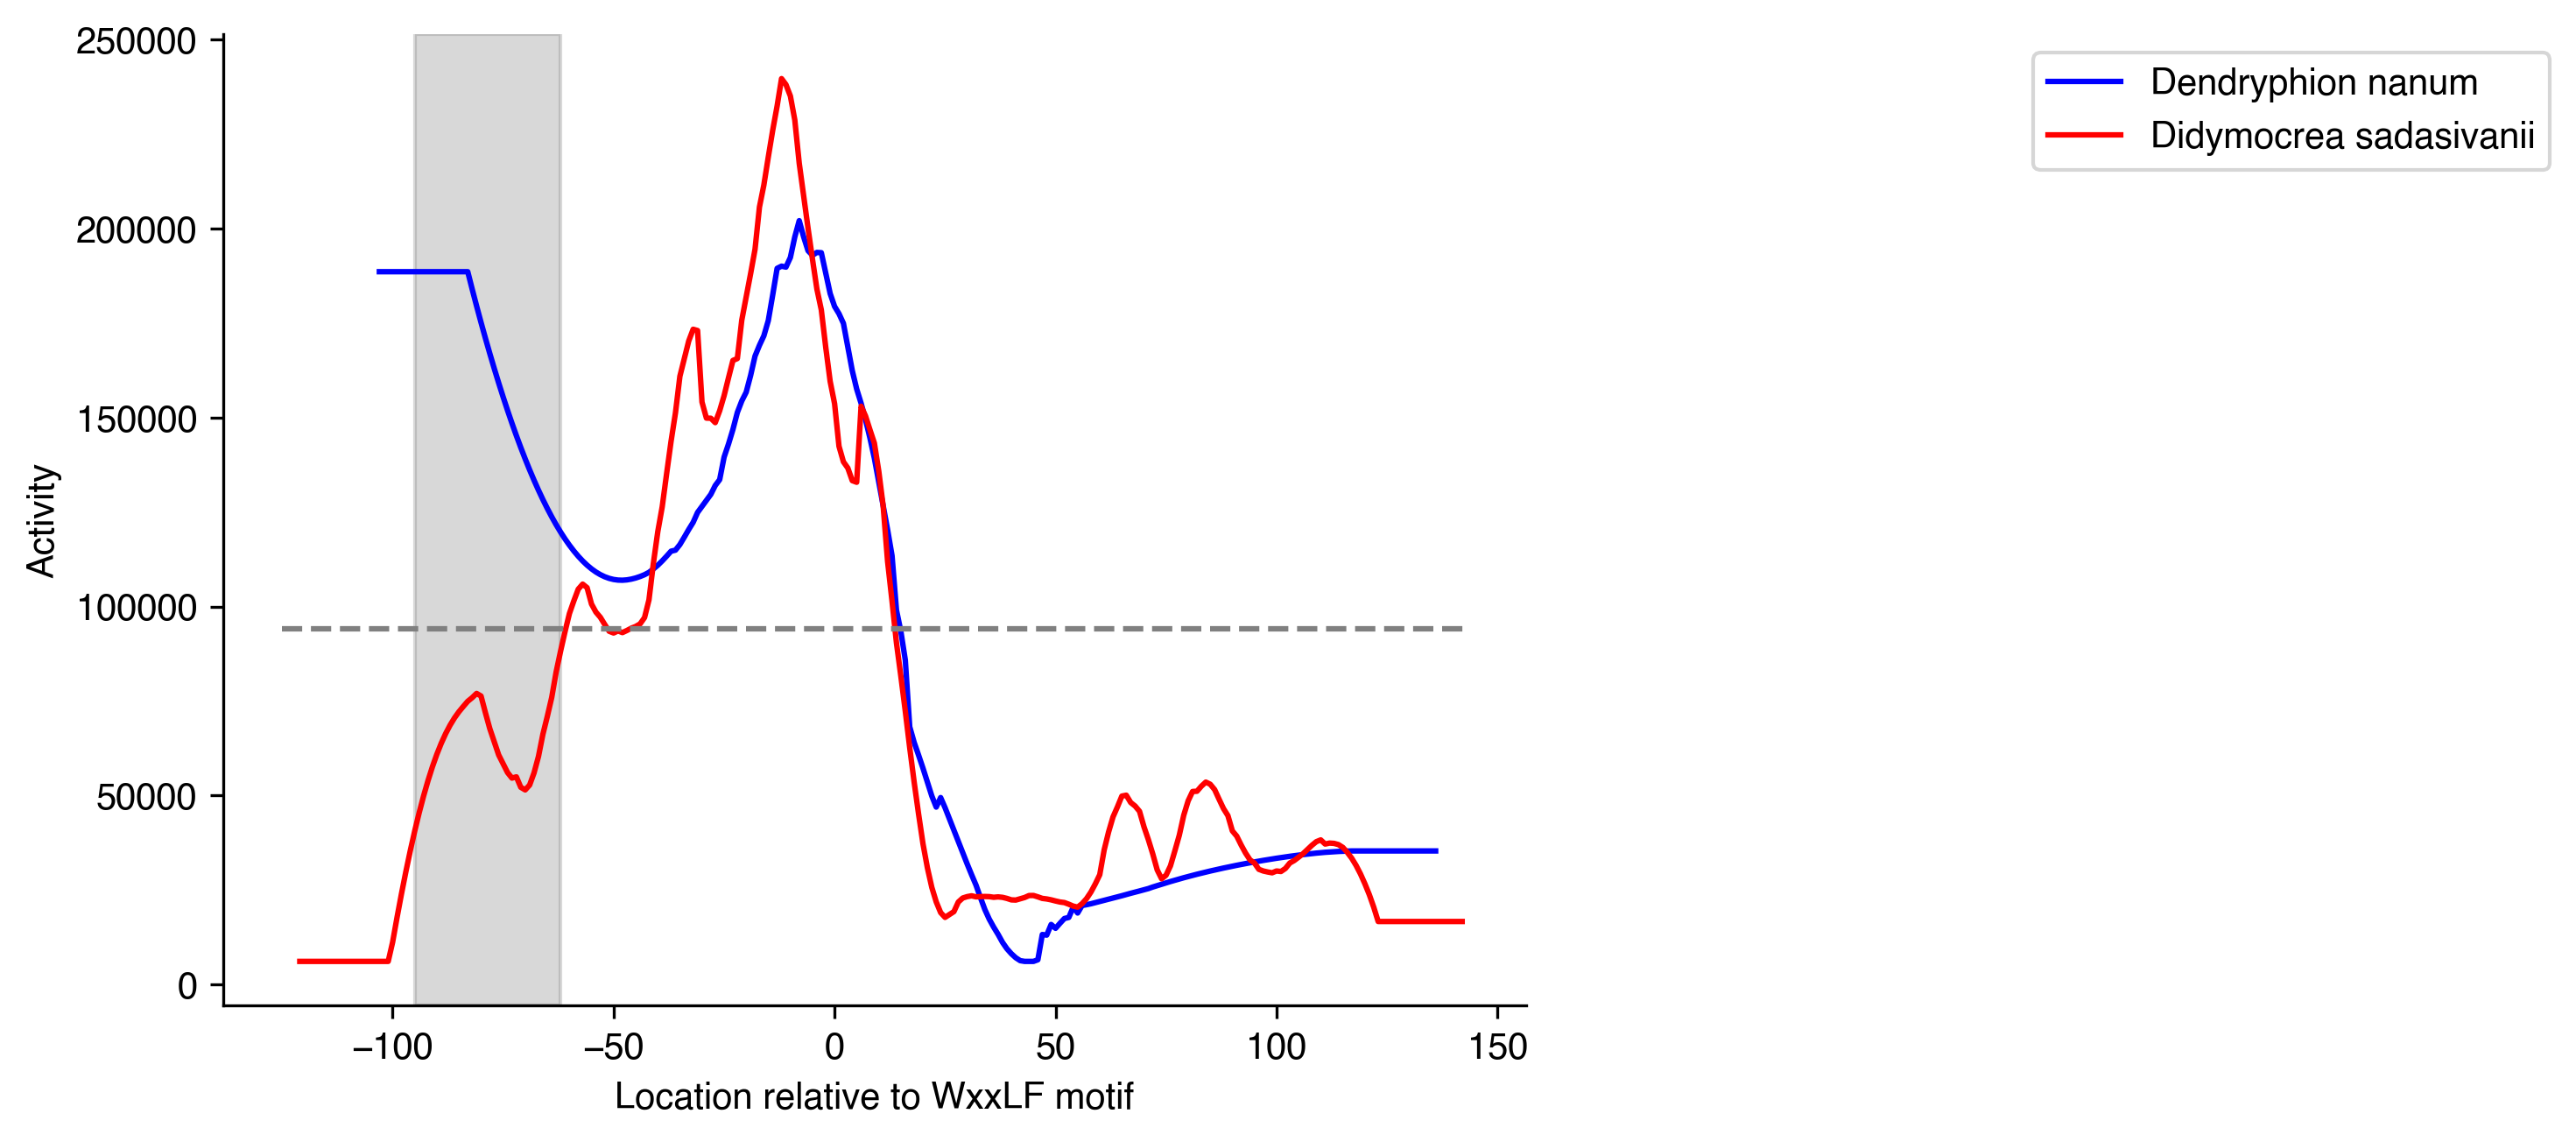

In [15]:
# Final interesting difference in two sequences
names = [
    'Dothideomycetes_jgi|Didsa1|357396|e_gw1.21.66.1',
    'Dothideomycetes_jgi|Denna1|471682|estExt_Genewise1.C_17_t20010'
]

colors= ['blue', 'red']
filtered = data[[name in names for name in data["SpeciesName"]]]

make_activity_trace_plot(filtered, -125)

# Looks for differing region and highlights
match = re.search("SFDSNLGAGLGPAFVSNDMSWDMSLSSAFTSIN", filtered.loc[305, "Seq"])
start = match.start() - re.search("W..LF", filtered.loc[305, "Seq"]).start()
end = match.end() - re.search("W..LF", filtered.loc[305, "Seq"]).start()

axs = plt.gca()
axs.axvspan(start, end, ymin=0, ymax=1, color='grey', alpha=0.3)

plt.savefig(f"../comparisons/Denna_Disda/activity_trace.pdf", format='pdf', bbox_inches='tight')

# Comparing tiles

In [17]:
import difflib
def get_start_end(sequence, tile):
    s = difflib.SequenceMatcher(None, sequence, tile)
    start_of_match, _, _ = s.find_longest_match(0, len(sequence), 0, len(tile))
    return start_of_match, start_of_match + 40

seq_data = pd.read_csv("../../../NN_interpretability_for_AD_prediction/Data/pm_gcn4_sort2_pools_allchannels_wrangled.csv")

In [18]:
seq_data

,aa_seq,activity,abundance,ratio
0,LQDFVLFDQPIRPHRQHNRNALQPPTRGINLNQQHRSQHL,270.500000,2275.157246,23705.971880
1,DLFGGLESSTPWIREQERIHLQYVEGLRWVTWGQMGHVEL,478.640464,4281.992228,7965.856073
2,VEHSPAEKSDDLEVVEPTSGHQRRKSGTSPPSGRHSSVSG,1081.420642,3180.013344,18161.451312
3,NAGTASRFLTTVVALCSPSDVSSTVLTGNARMQVRPIGPL,603.933187,1160.105019,52119.378755
4,QQQHRPHSTLQASSASPIQNPRVSDLSQDTGSIASSTSPQ,425.945104,3136.116978,19044.671497
...,...,...,...,...
17727,LYDESPDFGSGFDVSPNFAGSDFDAGGNDVWFPLFPQSNT,8178.009196,3209.784417,262143.000000
17728,HANRGPDFDALFDLTANSFVDGLDAASLAMFDTQQLDKVQ,9064.000000,4649.000000,262143.000000
17729,LYESPDFGYDVSPGFGSNDFDTGSNQWFSLFPDQSTTPDA,9064.000000,4649.000000,262143.000000
17730,TPNIPQEFFDFTEGFGEEFTDSTMLSPHLVPTGIMASKDS,4862.343223,111.000000,262143.000000


/var/folders/34/1pw3__x51kdfyh3vk72f5vc80000gn/T/ipykernel_69489/1803367961.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_overlapping_tiles["start"] = [get_start_end(curr_seq, i)[0] for i in curr_overlapping_tiles['aa_seq']]
/var/folders/34/1pw3__x51kdfyh3vk72f5vc80000gn/T/ipykernel_69489/1803367961.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_overlapping_tiles["start"] = [get_start_end(curr_seq, i)[0] for i in curr_overlapping_tiles['aa_seq']]
1 extra bytes in post.stringData array

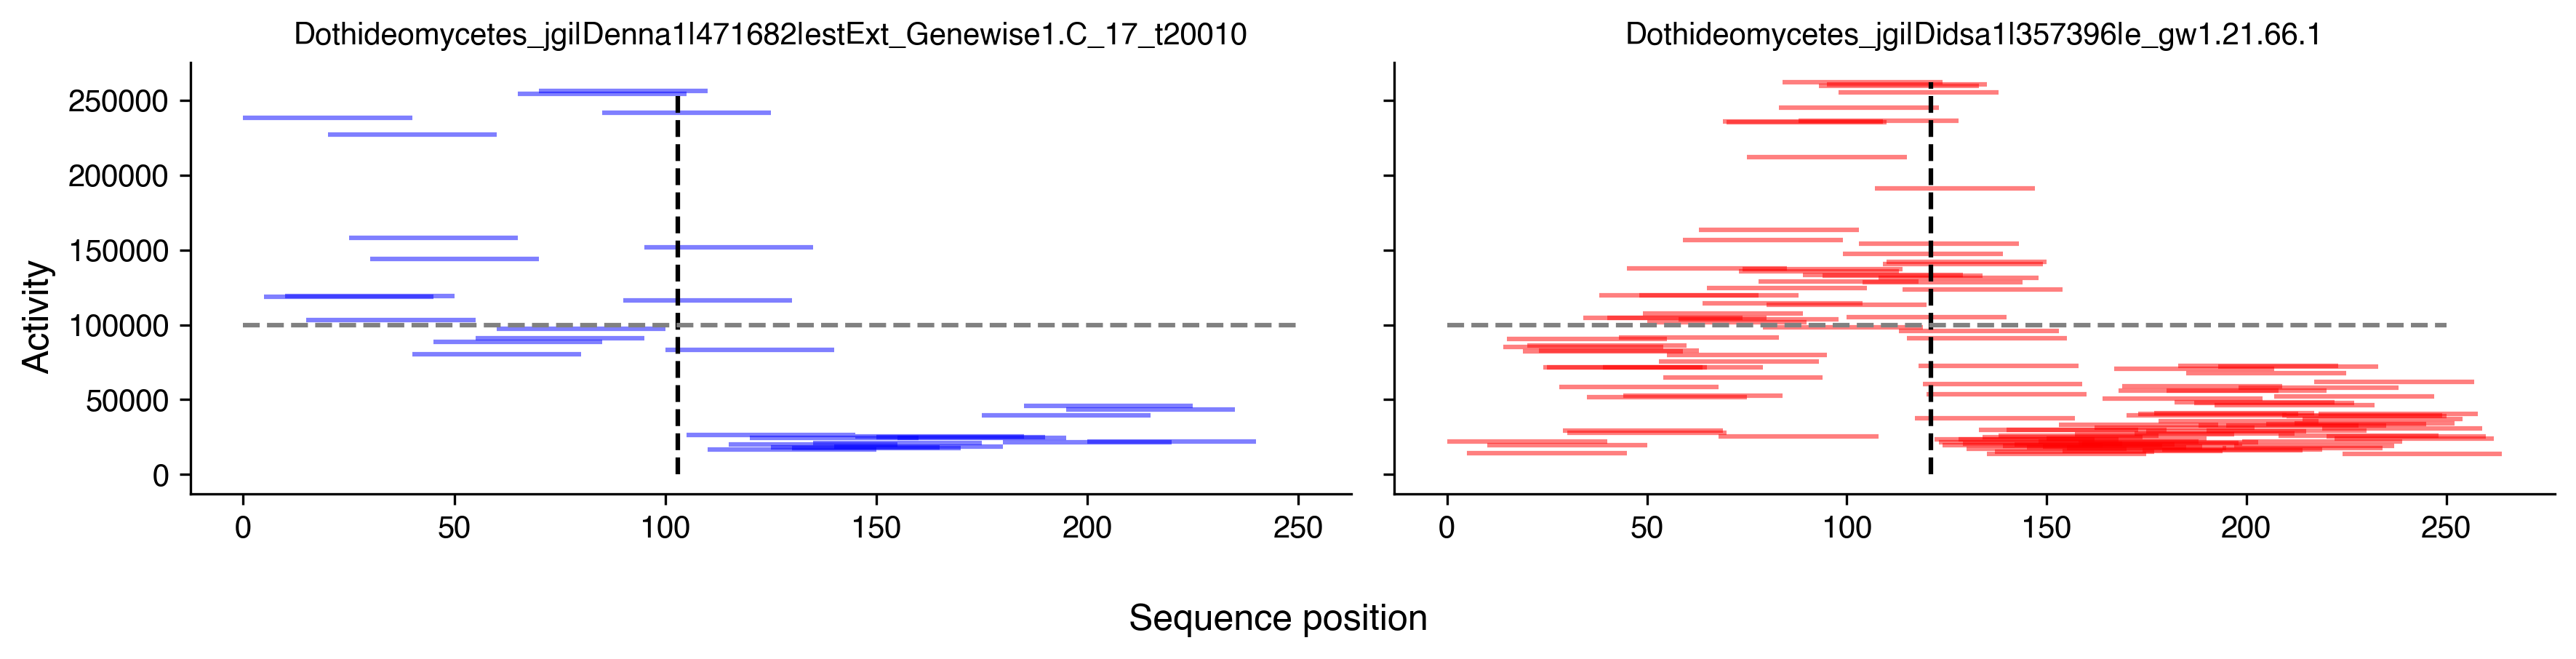

In [19]:
# This plot looks at the tile differences instead of the traces

fig, axs = plt.subplots(1, 2, figsize=(12,3), sharey=True)
for j, (idx, color) in enumerate(zip(filtered.index, colors)):
    curr_seq = filtered.loc[idx,"Seq"]

    # This complicated thingy gives us all the tiles that overlap
    curr_overlapping_tiles = seq_data[[seq in curr_seq for seq in seq_data["aa_seq"]]]
    
    # Get the starts of all the overlapping tiles
    curr_overlapping_tiles["start"] = [get_start_end(curr_seq, i)[0] for i in curr_overlapping_tiles['aa_seq']]

    axs[j].set_title(filtered.loc[idx, 'SpeciesName'], fontsize=10)
    sns.despine()

    for i in curr_overlapping_tiles.index:    
        axs[j].hlines(xmin=curr_overlapping_tiles.loc[i, 'start'], xmax=curr_overlapping_tiles.loc[i, 'start'] + 40, y=curr_overlapping_tiles.loc[i, 'ratio'], color=color, alpha=0.5)

    match = re.search("W..LF", curr_seq)
    start = match.start()

    axs[j].vlines(start, ymin=0, ymax=max(curr_overlapping_tiles["ratio"]), color='black', linestyle='--')

    # axs[j].vlines(curr_seq.find("MDLQ"), ymin=0, ymax=250000, color='black', linestyle='--')


    axs[j].hlines(100000, xmin=0, xmax=250, color='grey', linestyle='--')

fig.supxlabel("Sequence position")
fig.supylabel("Activity")

fig.tight_layout()

plt.savefig(f"../comparisons/Asptam_Aspwest/tile_plots.pdf")


/var/folders/34/1pw3__x51kdfyh3vk72f5vc80000gn/T/ipykernel_34823/3556531966.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_overlapping_tiles["start"] = [get_start_end(curr_seq, i)[0] for i in curr_overlapping_tiles['aa_seq']]
/var/folders/34/1pw3__x51kdfyh3vk72f5vc80000gn/T/ipykernel_34823/3556531966.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_overlapping_tiles["start"] = [get_start_end(curr_seq, i)[0] for i in curr_overlapping_tiles['aa_seq']]


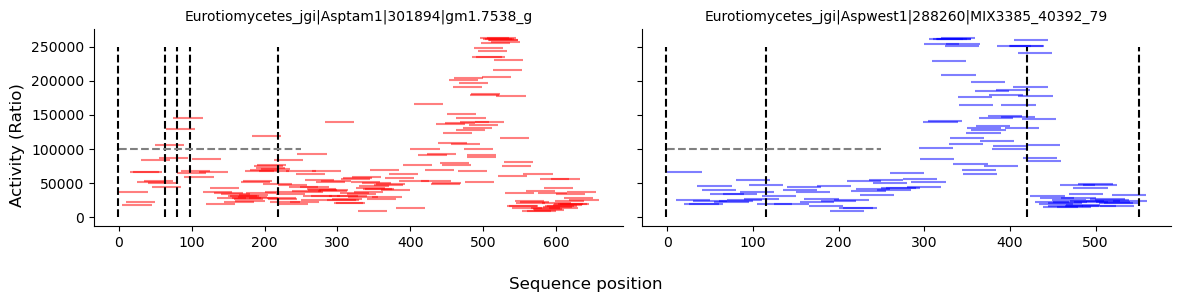

In [ ]:
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(12,3), sharey=True)
for j, (idx, color) in enumerate(zip(filtered.index, colors)):
    curr_seq = filtered.loc[idx,"Seq"]

    # This complicated thingy gives us all the tiles that overlap
    curr_overlapping_tiles = seq_data[[seq in curr_seq for seq in seq_data["aa_seq"]]]
    
    # Get the starts of all the overlapping tiles
    curr_overlapping_tiles["start"] = [get_start_end(curr_seq, i)[0] for i in curr_overlapping_tiles['aa_seq']]

    axs[j].set_title(filtered.loc[idx, 'SpeciesName'], fontsize=10)
    sns.despine()

    for i in curr_overlapping_tiles.index:    
        axs[j].hlines(xmin=curr_overlapping_tiles.loc[i, 'start'], xmax=curr_overlapping_tiles.loc[i, 'start'] + 40, y=curr_overlapping_tiles.loc[i, 'ratio'], color=color, alpha=0.5)


    first_W = curr_seq.find("W")
    axs[j].vlines(first_W, ymin=0, ymax=250000, color='black', linestyle='--')
    second_W = curr_seq.find("W", first_W+1)
    axs[j].vlines(second_W, ymin=0, ymax=250000, color='black', linestyle='--')

    third_W = curr_seq.find("W", second_W+1)
    axs[j].vlines(third_W, ymin=0, ymax=250000, color='black', linestyle='--')

    fourth_W = curr_seq.find("W", third_W+1)
    if fourth_W > 0:
        axs[j].vlines(fourth_W, ymin=0, ymax=250000, color='black', linestyle='--')

    fifth_W = curr_seq.find("W", fourth_W+1)
    if fifth_W > 0:
        axs[j].vlines(curr_seq.find("W", fifth_W) , ymin=0, ymax=250000, color='black', linestyle='--')

    # axs[j].vlines(curr_seq.find("MDLQ"), ymin=0, ymax=250000, color='black', linestyle='--')


    axs[j].hlines(100000, xmin=0, xmax=250, color='grey', linestyle='--')

fig.supxlabel("Sequence position")
fig.supylabel("Activity (Ratio)")

fig.tight_layout()

Text(0, 0.5, 'Number of tiles')

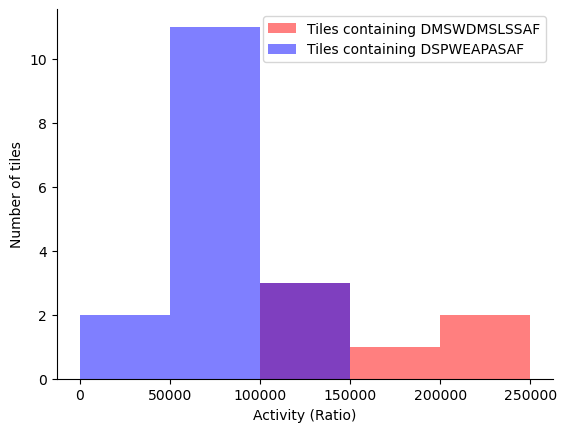

In [136]:
import numpy as np
bins = np.arange(0, 300000, 50000)

contains_N_term_AD = seq_data[["DMSWDMSLSSAF" in seq for seq in seq_data["aa_seq"]]] 

no_N_term_AD = seq_data[["DSPWEAPASAF" in seq for seq in seq_data["aa_seq"]]] 

plt.hist(contains_N_term_AD["ratio"], alpha=0.5, label="Tiles containing DMSWDMSLSSAF", color="red", bins=bins)
plt.hist(no_N_term_AD['ratio'], alpha=0.5, label="Tiles containing DSPWEAPASAF", color="blue", bins=bins)

plt.legend()

sns.despine()

plt.xlabel("Activity (Ratio)")
plt.ylabel("Number of tiles")



Text(0, 0.5, 'Number of tiles')

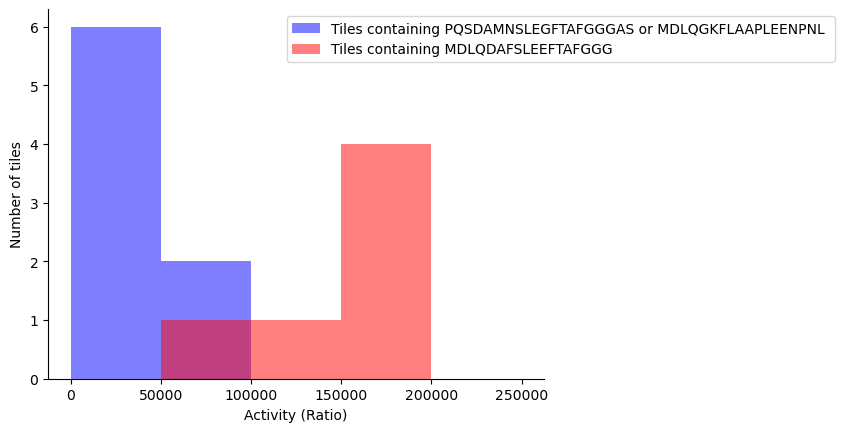

In [213]:
bins = np.arange(0, 300000, 50000)

contains_N_term_AD = seq_data[["MDLQDAFSLEEFTAFGGG" in seq for seq in seq_data["aa_seq"]]] 

no_N_term_AD_1 = seq_data[[("MDLQGKFLAAPLEENPNL" in seq) or ("PQSDAMNSLEGFTAFGGGAS" in seq) for seq in seq_data["aa_seq"]]] 
# no_N_term_AD_2 = seq_data[[ in seq for seq in seq_data["aa_seq"]]] 

# plt.hist(no_N_term_AD_1['ratio'], alpha=0.5, label="Tiles containing MDLQGKFLAAPLEENPNL", color="blue", bins=bins)
plt.hist(no_N_term_AD_1['ratio'], alpha=0.5, label="Tiles containing PQSDAMNSLEGFTAFGGGAS or MDLQGKFLAAPLEENPNL ", color="blue", bins=bins)
plt.hist(contains_N_term_AD["ratio"], alpha=0.5, label="Tiles containing MDLQDAFSLEEFTAFGGG", color="red", bins=bins)

plt.legend(loc='upper right', bbox_to_anchor=(1.1, 0.5, 0.5, 0.5))

sns.despine()

plt.xlabel("Activity (Ratio)")
plt.ylabel("Number of tiles")


In [138]:
no_N_term_AD[no_N_term_AD["ratio"] > 100000]

,aa_seq,activity,abundance,ratio
9275,FAGLQNDSPWEAPASAFTTINPHSVSGSTRTISPKDIFAD,3095.747054,1235.990479,104644.464222
12272,QNDSPWEAPASAFTTINPHSVSGSTRTISPKDIFADPFQS,3370.957230,1834.000000,119634.669889
17470,DSPWEAPASAFTTINPHSVSGSTRTISPKDIFADPFQSAP,3251.407941,1558.081629,104443.306680


/var/folders/34/1pw3__x51kdfyh3vk72f5vc80000gn/T/ipykernel_73517/1204148096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_N_term_AD["positive_count"] = [seq.count("R") + seq.count("K") for seq in no_N_term_AD["aa_seq"]]


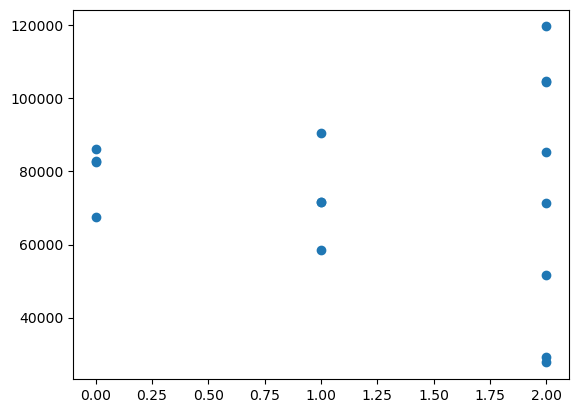

In [142]:
no_N_term_AD["positive_count"] = [seq.count("R") + seq.count("K") for seq in no_N_term_AD["aa_seq"]]
plt.scatter(no_N_term_AD["positive_count"], no_N_term_AD["ratio"])

In [10]:
filtered

,SpeciesName,Seq,Length,WxxLF_loc,SmoothedActivites,LinearCharge,LinearHydrophobicityKD,SmoothedActivitesLoess
1167,Sbay_sbayc645_g44.1,MSEYQPSLFALNPMGFSPLDGSKTTNENTSTLASSSISKPVVGQLV...,290,121,[ 37265.81491925 37265.81491925 37265.814919...,[ 0. 0. -0.2 -0.2 -0.2 0. 0. 0. 0. ...,[0. 0. 0.34 0.26222222 0...,"[49066.08646670471, 49066.08646670471, 49066.0..."
1184,Skud_5.91,MSEYQRSLFALNPMGFSPLDGSKPTNESTSASTTTAKPVVGQLVFD...,282,119,[ 32750.57213582 32750.57213582 32750.572135...,[ 0. 0. -0.2 0. 0. 0.2 0.2 0.2 0. ...,[0. 0. 0.34 0.19777778 0...,"[44945.689535450816, 44945.689535450816, 44945..."


In [ ]:
# with open("/Users/claireleblanc/Documents/grad_school/staller_lab/Evolution_stuff/gcn4_paper_stuff/Didsa1_Denna1.fasta", "w+") as f:
#     for seq, name in zip(filtered["Seq"], filtered["SpeciesName"]):
#         f.write(">" + name + "\n")
#         f.write(seq + "\n")

# with open("/Users/claireleblanc/Documents/grad_school/staller_lab/Evolution_stuff/gcn4_paper_stuff/Bisma1_KdCBS826.fasta", "w+") as f:
#     for seq, name in zip(filtered["Seq"], filtered["SpeciesName"]):
#         f.write(">" + name + "\n")
#         f.write(seq + "\n")

# with open("/Users/claireleblanc/Documents/grad_school/staller_lab/Evolution_stuff/gcn4_paper_stuff/Aspwest_Asptam.fasta", "w+") as f:
#     for seq, name in zip(filtered["Seq"], filtered["SpeciesName"]):
#         f.write(">" + name + "\n")
#         f.write(seq + "\n")

with open("/Users/claireleblanc/Documents/grad_school/staller_lab/Evolution_stuff/gcn4_paper_stuff/Skud_Sbay.fasta", "w+") as f:
    for seq, name in zip(filtered["Seq"], filtered["SpeciesName"]):
        f.write(">" + name + "\n")
        f.write(seq + "\n")

In [83]:
import os
os.chdir("/Users/claireleblanc/Documents/grad_school/staller_lab/Evolution_stuff/gcn4_paper_stuff/")

In [229]:
!mafft --auto Aspwest_Asptam.fasta > Aspwest_Asptam_mafft.fasta

outputhat23=16
treein = 0
compacttree = 0
stacksize: 8176 kb
rescale = 1
All-to-all alignment.
tbfast-pair (aa) Version 7.526
alg=L, model=BLOSUM62, 2.00, -0.10, +0.10, noshift, amax=0.0
0 thread(s)

outputhat23=16
Loading 'hat3.seed' ... 
done.
Writing hat3 for iterative refinement
rescale = 1
Gap Penalty = -1.53, +0.00, +0.00
tbutree = 1, compacttree = 0
Constructing a UPGMA tree ... 
    0 / 2
done.

Progressive alignment ... 
STEP     1 /1 
done.
tbfast (aa) Version 7.526
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
1 thread(s)

minimumweight = 0.000010
autosubalignment = 0.000000
nthread = 0
randomseed = 0
blosum 62 / kimura 200
poffset = 0
niter = 16
sueff_global = 0.100000
nadd = 16
Loading 'hat3' ... done.
rescale = 1

    0 / 2
Segment   1/  1    1- 676
done 001-001-1  accepted.
dvtditr (aa) Version 7.526
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)


Strategy:
 L-INS-i (Probably most accurate, very slow)
 Iterative refinement method

# Visualizing the alignment

In [34]:
def make_alignment_conservation_plot(alignment_file, remove_gaps=False):
    """
    Code to make alignment conservation plots
    """
    # Colors for the alignment conservation plots
    amino_acid_colors = {
        # Purples
        'F': '#FFA442',  
        'W': '#006CAF',
        'L': '#5B2B82',

        # Reds
        'D': '#E03839', 
        'E': '#FDA0A5', 

        # Blues
        'K': '#00B3E5',  
        'R': '#00B3E5',   

        # black
        'S': '#000000',  
        'P': '#000000', 

        # greys
        'A': '#787878',  
        'V': '#787878', 
        'I': '#787878', 
        'M': '#787878',  
        'T': '#787878',  
        'G': '#787878',  
        'C': '#787878', 
        'N': '#787878',  
        'Q': '#787878', 
        'H': '#787878',  
        'Y': '#787878', 
        'X': '#787878', 
        '-': "#FFFFFF"
    }

    # Read in alignment file
    with open(alignment_file, "r") as f:
        lines = f.readlines()

    names = []
    seqs = []
    seq = ""

    for line in lines:
        if line.startswith(">"):
            names.append(line.strip().replace(">",""))
            if len(seq) > 0:
                seqs.append(seq)
                seq = ""
        else:
            seq += line.strip()

    seqs.append(seq)

    # This will determine the position of the amino acid in the plot (i.e. X at the bottom, - at the top)
    amino_acids = ['X', 'Y', 'H', 'Q','N', 'C', 'G', 'T', 'M', 'I', 'V', 'A', 'S',  'P', 'R', 'K', 'D', 'E', 'L', 'W', 'F', '-']

    # List of sequence positions - Each entry is a dictionary with amino acid counts at the position
    amino_acid_dicts = [{aa: 0 for aa in amino_acids}.copy() for _ in range(len(seqs[0]))]

    # Go through each sequence and count the amino acids at each position
    for seq in seqs: 
        for i, aa in enumerate(seq): 
            amino_acid_dicts[i][aa] += 1
    
    if remove_gaps: 
        filtered_aa_dict = []
        for aa_d in amino_acid_dicts:
            # Only include positions that are less than 90% gaps
            if aa_d['-'] < len(seqs) * .90:
                filtered_aa_dict.append(aa_d)
        amino_acid_dicts = filtered_aa_dict

    from matplotlib.lines import Line2D
    fig, ax = plt.subplots(figsize=(20,3))

    for i, count_dict in enumerate(amino_acid_dicts): 
        bottom = 0

        # Add to the bar for each amino acid
        for aa, count in count_dict.items():
            p = ax.bar(i, count/len(seqs), label=aa, bottom=bottom, color = amino_acid_colors[aa])
            bottom += count/len(seqs)

    ax.set_xlabel("Alignment position")
    ax.set_ylabel("Percent of sequences")

    custom_lines = []

    # Code to add a legend
    for color in list(amino_acid_colors.values()):
        custom_lines.append(Line2D([0], [0], color=color, lw=2))

    ax.legend(custom_lines, list(amino_acid_colors.keys()), bbox_to_anchor=(1.05, 1.05), fontsize=5.5)
    plt.tight_layout()
    

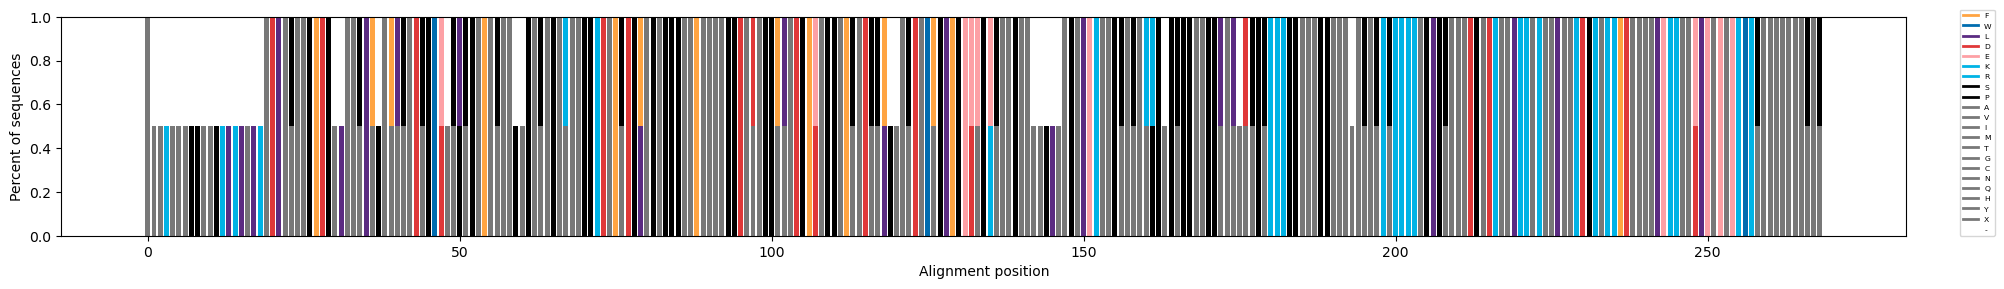

In [185]:
make_alignment_conservation_plot("cDidsa1_Denna1_mafft.fasta", )
# plt.savefig("Didsa1_Denna1_alignment_plot.pdf", type="pdf")

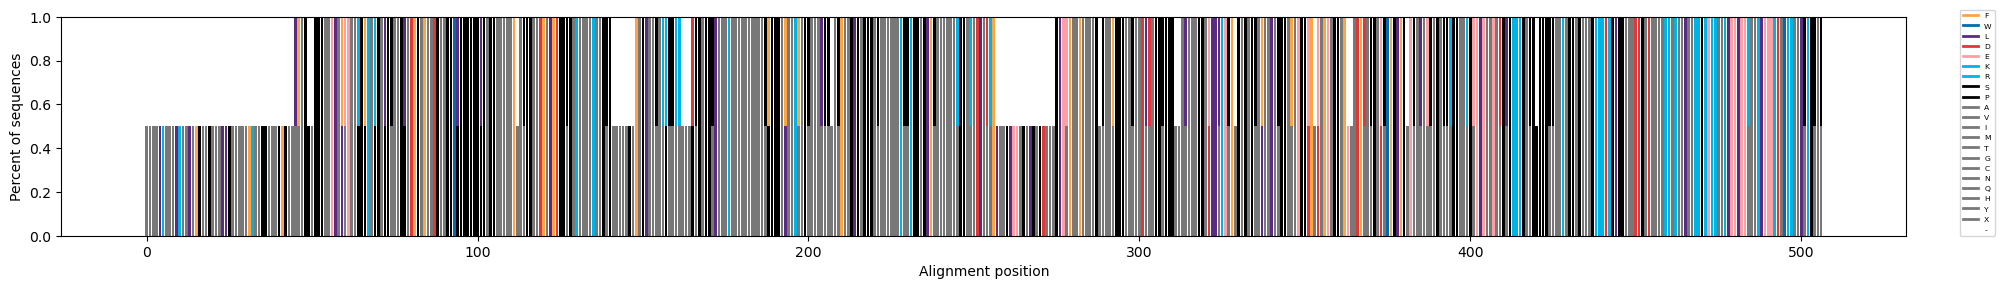

In [186]:
make_alignment_conservation_plot("Bisma1_KdCBS826_mafft.fasta",)

In [35]:
import rich
from rich_msa import RichAlignment
import logomaker
import protfasta

Matplotlib is building the font cache; this may take a moment.


In [93]:
# Create a function that takes in a fasta file containing a multiple sequence alignment (MSA),
# a coloring scheme for each amino acid, the start and stop positions in the amino acid MSA (for the
# range that the LogoMaker covers), the x-axis tick spacing, and the width and height values for logo
def DrawLogo(alignment_file, AA_color_scheme, start_position, end_position, x_axis_tick_space, figure_width = 16, figure_height = 4):

    # Read in fasta file
    fasta_file = protfasta.read_fasta(alignment_file, invalid_sequence_action = 'ignore', alignment = True, expect_unique_header = False)

    # Convert the alignment into a dataframe
    fasta_file = pd.DataFrame(fasta_file.items(), columns = ['Name', 'Sequence'])

    # Extract the protein sequences only and split each character in the alignment into multiple different columns
    ManyColumnsDF = fasta_file['Sequence'].str.split('', expand=True)

    # Create an empty dataframe
    PercentIdentityDF = pd.DataFrame()

    # Create a for loop that updates the amino acid percent identities in each position of the sequence alignment
    for column in ManyColumnsDF.loc[:, start_position:end_position + 1].columns:
        AAs = ManyColumnsDF[column].value_counts()
        #Create a dictionary with all of the amino acid percent identities initialized to 0
        AA_dict = {'A':0, 'C':0, 'D':0, 'E':0, 'F':0, 'G':0, 'H':0, 'I':0, 'K':0, 'L':0, 'M':0, 'N':0, 'P':0, 'Q':0, 'R':0, 'S':0, 'T':0, 'V':0, 'W':0, 'Y':0}
        # Iterate though each amino acid present in the column and match it with its key in the dict
        for AA in AAs.index.tolist():   # 'AAs.index.tolist()' finds unique amino acids that are present
            for key in AA_dict:         # in a position in the alignment. It then adds them once to a list
                if key == AA:
                    #After matching an amino acid to its key, the value count of the amino acid is used
                    # to calculate the percent identity of an amino acid in a specific position in the alignment
                    AA_dict[key] = AA_dict[key] + round(AAs[AA]/sum(AAs.values.tolist()) * 100)
                    PID_DF2 = pd.DataFrame(list(AA_dict.items()), columns = ['AA Code', column]).set_index('AA Code')
                    PercentIdentityDF[column] = PID_DF2[column]
                else:
                    continue

    # Take a specific section from the protein MSA
    TransposedDF = PercentIdentityDF.transpose()
    
    # Create a logomaker Logo object
    logo = logomaker.Logo(TransposedDF, color_scheme = AA_color_scheme, figsize=(figure_width, figure_height))

    # Remove black lines bordering LogoMaker plot
    logo.style_spines(visible = False)
    
    # Adjust the tick marks and the labels for the x and y axes
    logo.ax.set_xticks(range(start_position, end_position + 1, x_axis_tick_space))
    logo.ax.set_yticks(range(0, 110, 10))
    logo.ax.set_xlabel('MSA Position')
    logo.ax.set_ylabel('Percent Identity')
    
    # Add black lines (spines) on the x and y axes
    logo.style_spines(spines=['bottom', 'left'], visible = True)

In [36]:
# Amino acid colors, where gaps are colored black (used in actual alignment)
# Colors used for the alignment barplots and the sequence motifs
amino_acid_colors_black = {
    # Purples
    'F': '#ECA758',  
    'W': '#306BAC',
    'L': '#562F7F',

    # Reds
    'D': '#D04741', 
    'E': '#EAA3A7', 

    # Blues
    'K': '#52B0E1', 
    'R': '#52B0E1', 

    # black
    'S': '#000000', 
    'P': '#000000',

    # greys
    'A': '#787878',
    'V': '#787878',
    'I': '#787878',
    'M': '#228B22',
    'T': '#787878',
    'G': '#787878',
    'C': '#787878',
    'N': '#787878',
    'Q': '#787878',
    'H': '#787878',  
    'Y': '#787878', 
    '-': "#000000"
}

In [109]:
amino_acid_colors_white = {
    # Purples
    'F': '#ECA758',  
    'W': '#306BAC',
    'L': '#562F7F',

    # Reds
    'D': '#D04741', 
    'E': '#EAA3A7', 

    # Blues
    'K': '#52B0E1', 
    'R': '#52B0E1', 

    # black
    'S': '#000000', 
    'P': '#000000',

    # greys
    'A': '#787878',
    'V': '#787878',
    'I': '#787878',
    'M': '#228B22',
    'T': '#787878',
    'G': '#787878',
    'C': '#787878',
    'N': '#787878',
    'Q': '#787878',
    'H': '#787878',  
    'Y': '#787878', 
    '-': "#FFFFFF"
}

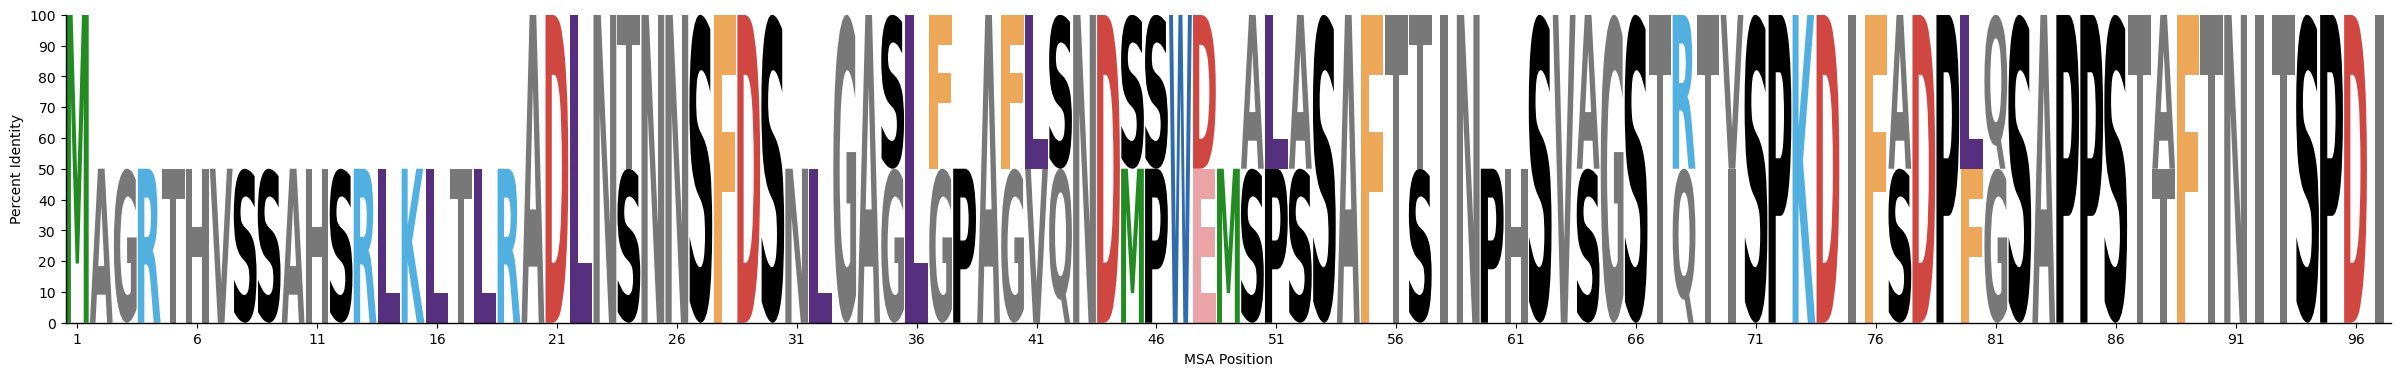

In [110]:
DrawLogo(
    alignment_file = "cDidsa1_Denna1_mafft.fasta",
    AA_color_scheme = amino_acid_colors_white,
    start_position = 1,  # Be careful with start/end positions;
    end_position = 96,    # might end up with an error if values aren't within range
    x_axis_tick_space = 5,
    figure_width = 30,
    figure_height = 4
)

In [37]:
# alignment = AlignIO.read("cDidsa1_Denna1_mafft.fasta", "fasta")
# alignment = AlignIO.read("Bisma1_KdCBS826_mafft.fasta", "fasta")
alignment = AlignIO.read('Aspwest_Asptam_mafft.fasta', "fasta")
# alignment = AlignIO.read('/Users/claireleblanc/Documents/grad_school/staller_lab/Evolution_stuff/gcn4_paper_stuff/Epini_Ophdi/seqs_mafft.fasta', 'fasta')

In [38]:
viewer = RichAlignment(
    names=["" for record in alignment],
    sequences=[str(record.seq) for record in alignment], 
    styles=amino_acid_colors_black
)

In [39]:
# Use a console to display alignment on one line
console = rich.console.Console(force_terminal=False, width=150, record=True)
align = rich.align.Align(viewer, width=150)
console.print(align)

# Save the stuff printed to the console as html format
html_txt = console.export_html()

# Write html to file
with open("Didsa1_Denna1_alignment.html", "w+") as f:
    f.write(html_txt)

  1  MQTPRQAGEAVKAARCSCRRTLMPRLPRPVRSLDNGSVEKPAEYEGRY-PLRNLQVTSGYLAFSAWVQVSCSYSSPGTGDAWGHPGIHLVDKEANQILGWVYDSHLLTAPIGLMPNVVSANPKTVIIQPYTEQELEYQQAF 
     1  M---------------------------------------PGAPLGRTGPIRRPQ---------------------------------------------RYESHLLTA--------------------FTAAPCLLPLLL 
                                                                                                                                                      
   141  QNGLFLNPSPGKSSSISRETDIIDPQRTSSFINISSPHPSESPVPGPLNFSTTSGSSSSLNNISTFDFTSFNTDHHQQTWLPTPPPPQPTAQ--NLNSNNDNNSANSLQEDFVLY---PSQHPRDSRAPAPLSTTPRYPAY 
    38  QNGL-LNPSNGKSPSFSSETDIIDPSRTSSSIFSPLLSSSESPVPGPLNFSSASRSSSSPNTISSFDVTSFNTDNHQQSWLPTPPPPQPLAQISNSNVNNNNNNNSSPQEDFVLYPPCPQPRPRDFSAPVPSSTAPRLAAY 
                                                                                                                                                      
   277  HPSLVRLGHLSRRHTLSLQQQRQQQ------QLSASPVQVPRLTRLASQSTGFPLSSSHRFSPSTRKHLLRLHAASVASNSPPAVLNSAYPNRPPVPLFNSPANPTYQKRQQI-PINHRRIMSTPNIAQGELWLRFVHSHK 
   178  HPFLVRSGHLPRRQSSSLQQPQQQQQ[

# Using new activity trace code

In [14]:
import numpy as np 

masterDF = pd.read_csv('traces/SC_Glucose_Ratio_MasterDF_20240930_withSeqFeatures.csv')
maxActivity = max(masterDF.Activity_SCglucose)
minActivity = min(masterDF[masterDF.Recovered].Activity_SCglucose)

Activity = 'Activity_SCglucose'

ActivityThresh=  94031


#define WT
ScerWTactivity = np.mean(masterDF[masterDF.ADseq=='STDSTPMFEYENLEDNSKEWTSLFDNDIPVTTDDVSLADK'][Activity])
ScerWT_DF = masterDF[masterDF.ADseq=='STDSTPMFEYENLEDNSKEWTSLFDNDIPVTTDDVSLADK']

Orthologs_DF = pd.read_csv('traces/OrthologTilingDFwActivities_20240930.csv', index_col=0)

FullOrthoDF =  pd.read_pickle('traces/FullOrthologDF_20240930')

In [15]:
domain_df = pd.read_table("/Users/claireleblanc/Documents/grad_school/staller_lab/Evolution_stuff/gcn4_paper_stuff/FullLengthUniqueGcn4Orthologs.fasta.tsv", header=None)
columns = [
    "name",
    "sequence_md5_digest",
    "length",
    "analysis", # Pfam, PRINTS, Gene3D
    "signature_acession",
    "signature_description",
    "start",
    "end",
    "score",
    "status", # T if true?
    "date",
    "interpro_annot",
    "interpro_description",
    "GO_annotations",
    "Pathway_annotations"
]

domain_df.columns = columns
cerevisiae_gene = 'Saccharomycotina_sp|P03069|GCN4_YEAST'
cerevisiae_domain_df = domain_df[[f"{cerevisiae_gene}" in name for name in domain_df["name"]]]
SUPERFAMILY = cerevisiae_domain_df[cerevisiae_domain_df["analysis"] == "SUPERFAMILY"]["signature_description"].values
filtered_domain_df = domain_df[[(s in SUPERFAMILY) for s in domain_df["signature_description"]]]
domain_coordinates = filtered_domain_df[['name', 'start', 'end']]

In [16]:

def get_overlapping_tile_ADs(tile_tempDF):
    ADs = []
    AD_end = 0
    AD_start = 0

    for i in tile_tempDF.index: 
        if tile_tempDF.loc[i, "Activity"] > ActivityThresh:
            # If start of new active tile is after the end of last active tile
            if tile_tempDF.loc[i, "NativeLocation"] - 19 > AD_end:
                # Save old AD and start a new AD
                if AD_end > 0: 
                    ADs.append((AD_start, AD_end))
                # Make new AD
                AD_end = tile_tempDF.loc[i, "NativeLocation"] + 20
                AD_start = tile_tempDF.loc[i, "NativeLocation"] - 19

            # Extend current AD
            else: 
                AD_end = tile_tempDF.loc[i, "NativeLocation"] + 20

    # Add the final AD to the list
    if AD_end > 0: 
        ADs.append((AD_start, AD_end))
    
    return ADs


In [120]:
names = [
    "Cpar_CPAG02317",
    "Cort_emb_CCG25633.1_CandidaOrthopsilosis"
]

names = [
    "Saccharomycotina_jgi|Spapa3|150094|estExt_genewise1plus.C_30355",
    "Cten_EGV62856.1_CandidaTenuisATCC10573"

]

# Does not even align the WLF
names = [
    "Tdel_TDEL0H02940",
    "Zyro_ZYRO0D09174g"
]

names = [
    "Agos_ADL012C",
    "Aace_AGO11762.1_SaccharomycetaceaeAshbyaAceri"
]

names = [
    "Klth_KLTH0F12760g",
    "Kwal_Kwal55.20854"
]

names = [
    "Orbiliomycetes_tr|S8AP85|S8AP85_DACHA",
    "Pezizomycetes_jgi|Ascim1|361388|estExt_Genemark1.C_290083"
]
# filtered = data[[name in names for name in data["SpeciesName"]]]
# with open("/Users/claireleblanc/Documents/grad_school/staller_lab/Evolution_stuff/gcn4_paper_stuff/Orbi_Pezi.fasta", "w+") as f:
#     for seq, name in zip(filtered["Seq"], filtered["SpeciesName"]):
#         f.write(">" + name + "\n")
#         f.write(seq + "\n")

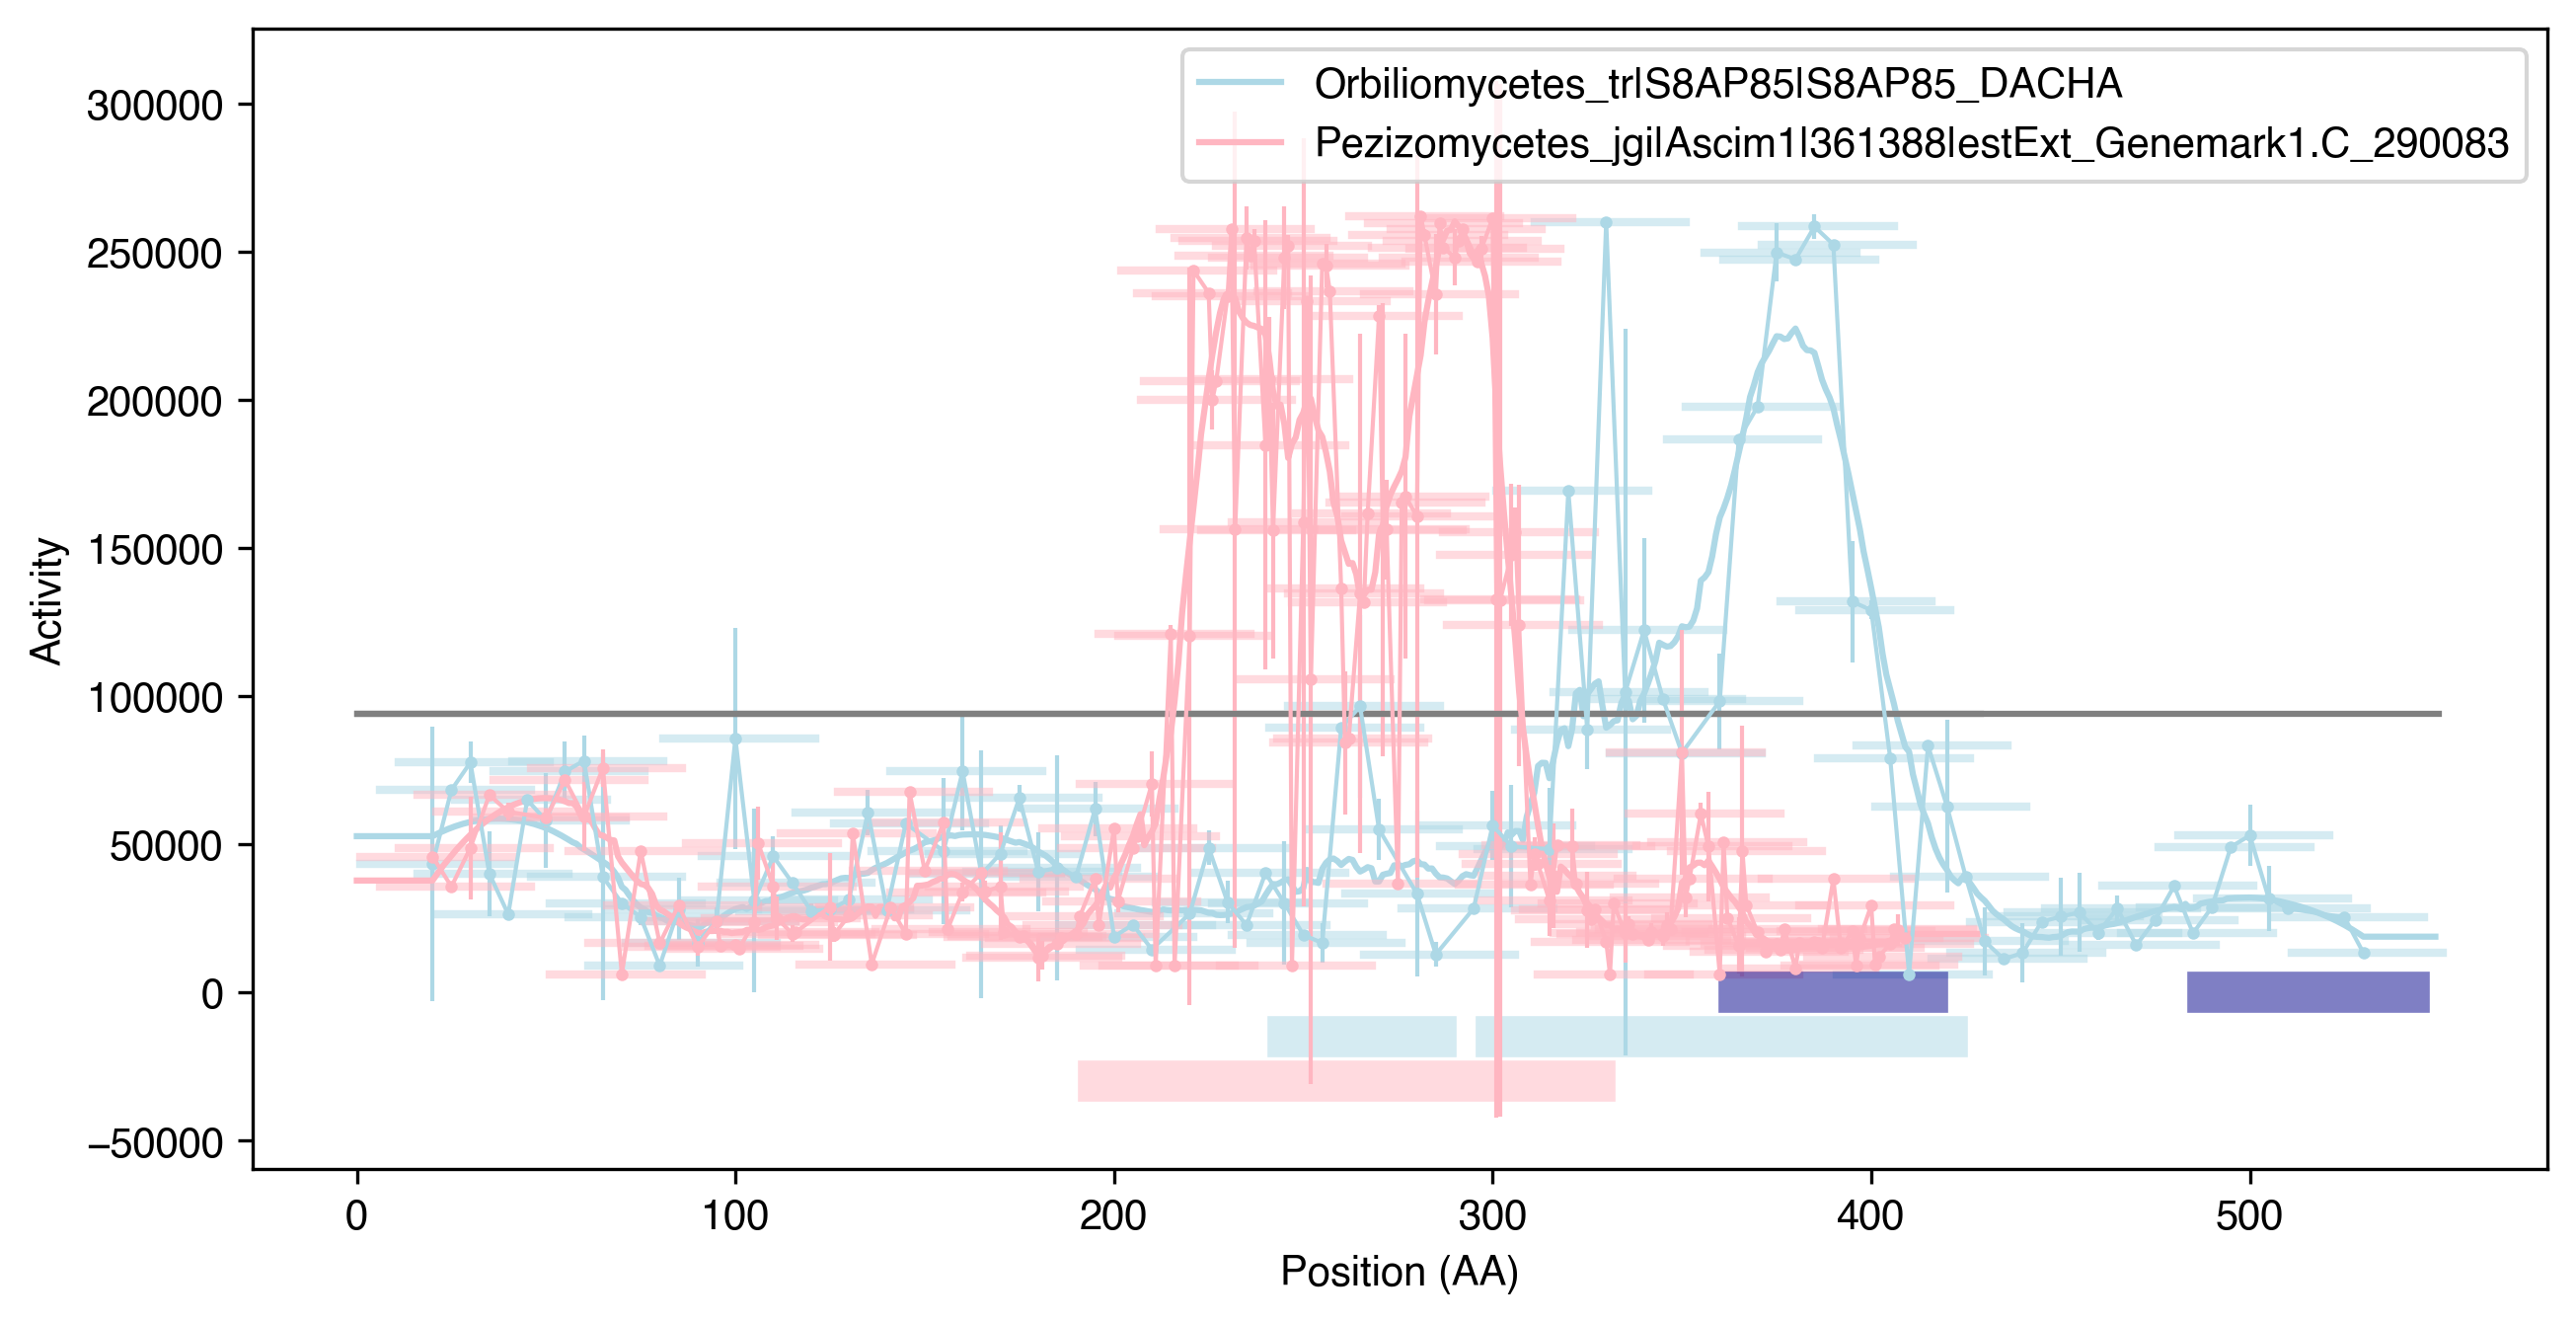

In [121]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

# make_activity_trace("Sbay_sbayc645_g44.1", axs)

# make_activity_trace("Skud_5.91", axs)

name = names[0]
tracecolor ='lightblue'
x = 'NativeLocation'# 
y = 'Activity'
halfwindow =20 

# Plot tiles first
tile_tempDF = Orthologs_DF[Orthologs_DF["SpeciesNames"] == name].sort_values("NativeLocation").dropna(subset="Activity")

# ax.plot(tile_tempDF[x],tile_tempDF[y],c=tracecolor,linewidth=2,marker='.',label='AD activity', linestyle='--')
ax.errorbar(tile_tempDF[x],tile_tempDF[y],yerr=tile_tempDF['Stdev_BYS4_BioReps'],c='lightblue',mfc=tracecolor,linewidth=1,marker='.',mew=0)


# Plotting tile lengths
for i, entry in tile_tempDF.iterrows():
    ax.plot([entry[x]+1-halfwindow,entry[x]+1+halfwindow],[entry[y],entry[y]],linewidth=2,c=tracecolor,alpha=.5)

tempDF = FullOrthoDF[FullOrthoDF.SpeciesName==name]

# Plotting threshold
ax.plot([0,len(tempDF.Seq.values[0])],[ActivityThresh,ActivityThresh],c='gray')

# Plotting the blue line
ax.plot(tempDF.SmoothedActivitesLoess.values[0], c = 'lightblue', label=name)

# DBD location
DBD_tempDF = domain_coordinates[domain_coordinates["name"] == name]
ax.plot([DBD_tempDF.start,DBD_tempDF.end],[1,1],c="darkblue",linewidth=10,alpha=.5)

# AD locations
AD_ls = get_overlapping_tile_ADs(tile_tempDF)
for start, end in AD_ls:
    ax.plot([start,end],[-15000,-15000],c="lightblue",linewidth=10,alpha=.5)



### -------- PLOTTING THE SECOND SEQUENCE --------####
name = names[1]
tracecolor ='lightpink'
x = 'NativeLocation'# 
y = 'Activity'
halfwindow =20 

# Plot tiles first
tile_tempDF = Orthologs_DF[Orthologs_DF["SpeciesNames"] == name].sort_values("NativeLocation").dropna(subset="Activity")

# ax.plot(tile_tempDF[x],tile_tempDF[y],c=tracecolor,linewidth=2,marker='.',label='AD activity')
ax.errorbar(tile_tempDF[x],tile_tempDF[y],yerr=tile_tempDF['Stdev_BYS4_BioReps'],c=tracecolor,mfc=tracecolor,linewidth=1,marker='.',mew=0)


# Plotting tile lengths
for i, entry in tile_tempDF.iterrows():
    ax.plot([entry[x]+1-halfwindow,entry[x]+1+halfwindow],[entry[y],entry[y]],linewidth=2,c=tracecolor,alpha=.5)

tempDF = FullOrthoDF[FullOrthoDF.SpeciesName==name]

# Plotting threshold
ax.plot([0,len(tempDF.Seq.values[0])],[ActivityThresh,ActivityThresh],c='gray')

# Plotting the blue line
ax.plot(tempDF.SmoothedActivitesLoess.values[0], c = tracecolor, label=name)

# DBD location
DBD_tempDF = domain_coordinates[domain_coordinates["name"] == name]
ax.plot([DBD_tempDF.start,DBD_tempDF.end],[1,1],c="darkblue",linewidth=10,alpha=.5)

# AD locations
AD_ls = get_overlapping_tile_ADs(tile_tempDF)
for start, end in AD_ls:
    ax.plot([start,end],[-30000,-30000],c=tracecolor,linewidth=10,alpha=.5)

# match = re.search("ASTSSSDSSTLLGELVFEKFACADNLDHEALAKLERSVPIFSE", tempDF.Seq.values[0])
# start = match.start()
# end = match.end()

# ax.axvspan(start, end, ymin=0, ymax=300000, color='grey', alpha=0.3)
plt.xlabel('Position (AA)'),plt.ylabel('Activity')
plt.legend()

# Manually adding AD to the legend

# handles, labels = ax.get_legend_handles_labels()
# custom_patch = Patch(color='lightblue', label='AD')
# handles.append(custom_patch)
# labels.append('AD')

# custom_patch = Patch(color='orange', label='WxxLF')
# handles.append(custom_patch)
# labels.append('WxxLF')

# custom_patch = Patch(color='darkblue', label='DBD')
# handles.append(custom_patch)
# labels.append('DBD')

# ax.legend(handles, labels, loc=1)
# ax.set_title(f"{name}")
# plt.savefig(f'figures/{name}.pdf', format="pdf", bbox_inches='tight')
# plt.close()


In [115]:
# Plot tiles first
tile_tempDF_1 = Orthologs_DF[Orthologs_DF["SpeciesNames"] == names[0]].sort_values("NativeLocation").dropna(subset="Activity")

In [116]:
# Plot tiles first
tile_tempDF_2 = Orthologs_DF[Orthologs_DF["SpeciesNames"] == names[1]].sort_values("NativeLocation").dropna(subset="Activity")

In [117]:
tile_tempDF_1[tile_tempDF_1["Activity"] > ActivityThresh]

,SpeciesNames,NativeLocation,NormLocation,Seq,Activity,Stdev_BYS4_BioReps
87380,Klth_KLTH0F12760g,20,-102,MTTTPLPSLFDITSLDMGRAELLQQPHQEASALHFSGPVV,97889.879038,8676.948238
87398,Klth_KLTH0F12760g,110,-12,DAESLVADHFLASSADSTPLFELDAVESDPQGWNSLFDDD,199190.071761,5523.383941
87399,Klth_KLTH0F12760g,115,-7,VADHFLASSADSTPLFELDAVESDPQGWNSLFDDDIAVSV,255332.611608,7584.515255
87400,Klth_KLTH0F12760g,120,-2,LASSADSTPLFELDAVESDPQGWNSLFDDDIAVSVSDETI,111598.914170,133183.671905
87401,Klth_KLTH0F12760g,125,3,DSTPLFELDAVESDPQGWNSLFDDDIAVSVSDETIAPSVF,250366.487826,14200.120865
87402,Klth_KLTH0F12760g,130,8,FELDAVESDPQGWNSLFDDDIAVSVSDETIAPSVFSGSDA,209226.594724,NaN
87403,Klth_KLTH0F12760g,135,13,VESDPQGWNSLFDDDIAVSVSDETIAPSVFSGSDAISEGA,113239.932831,13852.099312
87423,Klth_KLTH0F12760g,235,113,NRKSRAAPLTPVVPESDDPVAMKRAKNTEAARRSRARKLQ,95605.839740,4710.183546


In [118]:
tile_tempDF_2[tile_tempDF_2["Activity"] > ActivityThresh]

,SpeciesNames,NativeLocation,NormLocation,Seq,Activity,Stdev_BYS4_BioReps
86058,Kwal_Kwal55.20854,80,-28,PLLDFSHQLTPGSARAGSDPLVAEQFFASSTDSTPMFELE,104525.909390,12849.166212
86060,Kwal_Kwal55.20854,90,-18,PGSARAGSDPLVAEQFFASSTDSTPMFELEAVESDPQGWT,96722.530313,14560.328171
86061,Kwal_Kwal55.20854,95,-13,AGSDPLVAEQFFASSTDSTPMFELEAVESDPQGWTSLFED,258912.680237,3727.591234
86062,Kwal_Kwal55.20854,100,-8,LVAEQFFASSTDSTPMFELEAVESDPQGWTSLFEDDIAVS,260489.418855,1026.805488
86063,Kwal_Kwal55.20854,105,-3,FFASSTDSTPMFELEAVESDPQGWTSLFEDDIAVSVADET,261396.150325,NaN
86064,Kwal_Kwal55.20854,110,2,TDSTPMFELEAVESDPQGWTSLFEDDIAVSVADETIAPAI,246717.508735,NaN
86065,Kwal_Kwal55.20854,115,7,MFELEAVESDPQGWTSLFEDDIAVSVADETIAPAIFSEPT,261585.625593,308.627487
86067,Kwal_Kwal55.20854,125,17,PQGWTSLFEDDIAVSVADETIAPAIFSEPTASPQKAAAIE,129513.562358,19291.498140


# Random other code

In [257]:
colors = ["red", 'blue', 'green']
amino_acid_colors_black = {
    # Purples
    'F': '#ECA758',  
    'W': '#306BAC',
    'L': '#562F7F',

    # Reds
    'D': '#D04741', 
    'E': '#EAA3A7', 

    # Blues
    'K': '#52B0E1', 
    'R': '#52B0E1', 

    # black
    'S': '#000000', 
    'P': '#000000',

    # greys
    'A': '#787878',
    'V': '#787878',
    'I': '#787878',
    'M': '#228B22',
    'T': '#787878',
    'G': '#787878',
    'C': '#787878',
    'N': '#787878',
    'Q': '#787878',
    'H': '#787878',  
    'Y': '#787878', 
    '-': "#000000"
}

def get_start_end(sequence, tile):
    s = difflib.SequenceMatcher(None, sequence, tile)
    start_of_match, _, _ = s.find_longest_match(0, len(sequence), 0, len(tile))
    return start_of_match, start_of_match + 40



def make_activity_trace_plot(filtered):

    # Make activity trace
    for idx, color in zip(filtered.index, colors):
        curr_seq = filtered.loc[idx, "Seq"]
        match = re.search("W..LF", curr_seq)
        start = match.start()
        length = len(filtered.loc[idx, "SmoothedActivitesLoess"])
        x_vals = range(-start, length - start)

        plt.plot(x_vals, filtered.loc[idx, "SmoothedActivitesLoess"], label = filtered.loc[idx, "SpeciesName"], color = color)

    plt.legend(fontsize=10, loc='upper right', bbox_to_anchor=(1.1, 0.5, 0.5, 0.5))


    plt.hlines(80000, xmin=-start, xmax=length-start, color='grey', linestyle='--')
    sns.despine()
    
    # plt.savefig(f"{outdir}/activity_trace.pdf")
    # plt.savefig(f"{outdir}/activity_trace.png")

def make_tile_activity_plot(filtered):

    seq_data = pd.read_csv("/Users/claireleblanc/Documents/grad_school/staller_lab/Data/pm_gcn4_sort2_pools_allchannels_wrangled.csv")

    fig, axs = plt.subplots(1, len(filtered), figsize=(6*len(filtered),3), sharey=True)

    for j, (idx, color) in enumerate(zip(filtered.index, colors)):
        curr_seq = filtered.loc[idx,"Seq"]

        # This complicated thingy gives us all the tiles that overlap
        curr_overlapping_tiles = seq_data[[seq in curr_seq for seq in seq_data["aa_seq"]]]
        
        # Get the starts of all the overlapping tiles
        curr_overlapping_tiles["start"] = [get_start_end(curr_seq, i)[0] for i in curr_overlapping_tiles['aa_seq']]

        axs[j].set_title(filtered.loc[idx, 'SpeciesName'], fontsize=10)
        sns.despine()

        for i in curr_overlapping_tiles.index:    
            axs[j].hlines(xmin=curr_overlapping_tiles.loc[i, 'start'], xmax=curr_overlapping_tiles.loc[i, 'start'] + 40, y=curr_overlapping_tiles.loc[i, 'ratio'], color=color, alpha=0.5)

        W_loc = curr_seq.find("W")
        while W_loc > -1: 
            axs[j].vlines(W_loc, ymin=0, ymax=250000, color='black', linestyle='--')
            W_loc = curr_seq.find("W", W_loc+1)

        axs[j].hlines(100000, xmin=0, xmax=250, color='grey', linestyle='--')

    fig.supxlabel("Sequence position")
    fig.supylabel("Activity (Ratio)")

    fig.tight_layout()
    return axs
    # plt.savefig(f"{outdir}/tile_activity.pdf")
    # plt.savefig(f"{outdir}/tile_activity.png")

def make_alignment_vis(filtered, outdir):

    with open(f"{outdir}/seqs.fasta", "w+") as f:
        for seq, name in zip(filtered["Seq"], filtered["SpeciesName"]):
            f.write(">" + name + "\n")
            f.write(seq + "\n")
    
    os.system(f"mafft --auto {outdir}/seqs.fasta > {outdir}/seqs_mafft.fasta")

    alignment = AlignIO.read(f'{outdir}/seqs_mafft.fasta', "fasta")

    viewer = RichAlignment(
        names=["" for record in alignment],
        sequences=[str(record.seq) for record in alignment], 
        styles=amino_acid_colors_black
    )

    # Use a console to display alignment on one line
    console = rich.console.Console(force_terminal=False, width=150, record=True)
    align = rich.align.Align(viewer, width=150)
    console.print(align)

    # Save the stuff printed to the console as html format
    html_txt = console.export_html()
    return html_txt

    # Write html to file
    # with open(f"{outdir}/seqs_alignment.html", "w+") as f:
    #     f.write(html_txt)


In [301]:
names = ['Sordariomycetes_jgi|Bisma1|428522|MIX5565_237310_87','Sordariomycetes_jgi|KdCBS826_1|635101|MIX5102_360246_86', 'Sordariomycetes_jgi|Hypfra2|530715|MIX4042_126314_88']
names = ['Pezizomycetes_jgi|Chove1|1841465|estExt_fgenesh1_pg.C_140116','Pezizomycetes_jgi|Morco1|575945|gm1.6721_g'] #,'Pezizomycetes_jgi|Morimp1|628980|gm1.7011_g' ]
names = ['Eurotiomycetes_jgi|Asptam1|301894|gm1.7538_g','Eurotiomycetes_jgi|Aspwest1|288260|MIX3385_40392_79']
filtered = data[[name in names for name in data["SpeciesName"]]]

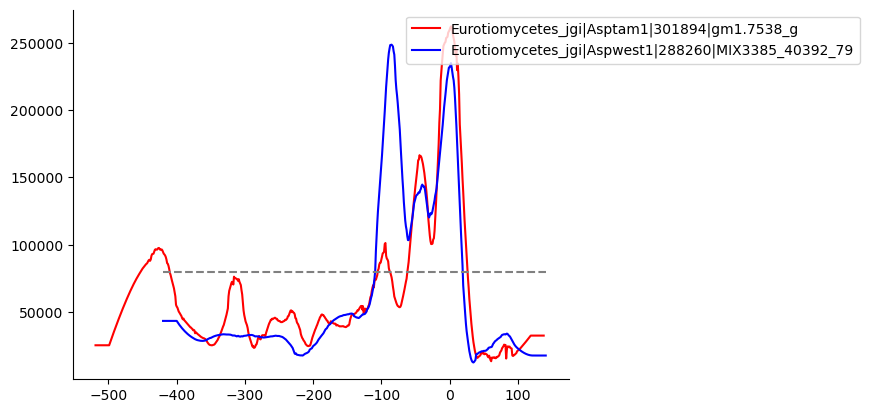

In [302]:
import re
make_activity_trace_plot(filtered)

In [306]:
filtered

,SpeciesName,Seq,Length,WxxLF_loc,SmoothedActivites,LinearCharge,LinearHydrophobicityKD,SmoothedActivitesLoess
107,Eurotiomycetes_jgi|Asptam1|301894|gm1.7538_g,MQTPRQAGEAVKAARCSCRRTLMPRLPRPVRSLDNGSVEKPAEYEG...,658,519,[ 37356.09271521 37356.09271521 37356.092715...,[ 0. 0. 0.2 0.2 0.2 0.2 0. -0.2 -0.2 ...,[0. 0. 0.31333333 0.19333333 0...,"[25312.636836512895, 25312.636836512895, 25312..."
109,Eurotiomycetes_jgi|Aspwest1|288260|MIX3385_403...,MPGAPLGRTGPIRRPQRYESHLLTAFTAAPCLLPLLLQNGLLNPSN...,562,420,[ 67606.88023109 67606.88023109 67606.880231...,[ 0. 0. 0. 0. 0. 0.2 0.2 0.2 0.2 ...,[0. 0. 0.50222222 0.54444444 0...,"[43412.876769398375, 43412.876769398375, 43412..."


/var/folders/34/1pw3__x51kdfyh3vk72f5vc80000gn/T/ipykernel_73517/2868214732.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_overlapping_tiles["start"] = [get_start_end(curr_seq, i)[0] for i in curr_overlapping_tiles['aa_seq']]
/var/folders/34/1pw3__x51kdfyh3vk72f5vc80000gn/T/ipykernel_73517/2868214732.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_overlapping_tiles["start"] = [get_start_end(curr_seq, i)[0] for i in curr_overlapping_tiles['aa_seq']]


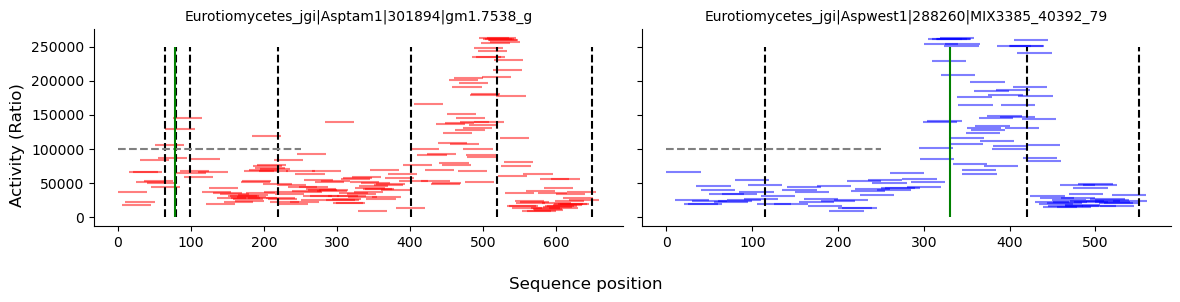

In [319]:
axs = make_tile_activity_plot(filtered)



match = re.search("FSTDQFGADF", filtered.loc[109, "Seq"])
start = match.start()

axs[1].vlines(start, 0, 250000, color='green')

match = re.search("DAWGHPGIHLVDKEANQILGWVYDSHLL", filtered.loc[107, "Seq"])
start = match.start()

axs[0].vlines(start, 0, 250000, color="green")


# match = re.search("SLEGFTAFG", filtered.loc[545, "Seq"])
# start = match.start()

# axs[2].vlines(start, 0, 250000)

In [313]:
seq_data = pd.read_csv("/Users/claireleblanc/Documents/grad_school/staller_lab/Data/pm_gcn4_sort2_pools_allchannels_wrangled.csv")



curr_seq = filtered.loc[107,"Seq"]

# This complicated thingy gives us all the tiles that overlap
curr_overlapping_tiles = seq_data[[seq in curr_seq for seq in seq_data["aa_seq"]]]

# Get the starts of all the overlapping tiles
curr_overlapping_tiles["start"] = [get_start_end(curr_seq, i)[0] for i in curr_overlapping_tiles['aa_seq']]


curr_overlapping_tiles[["DRFGDDLIPTTESTML" in tile for tile in curr_overlapping_tiles["aa_seq"]]]


/var/folders/34/1pw3__x51kdfyh3vk72f5vc80000gn/T/ipykernel_73517/3049126334.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_overlapping_tiles["start"] = [get_start_end(curr_seq, i)[0] for i in curr_overlapping_tiles['aa_seq']]


,aa_seq,activity,abundance,ratio,start
9202,PDLFDLHADRFGDDLIPTTESTMLSPQQMTAGVMAGPDSL,2951.968291,2769.044918,69081.931316,420
10042,IPSDLPDLFDLHADRFGDDLIPTTESTMLSPQQMTAGVMA,310.485533,938.302615,53192.596361,415
10265,FDLHADRFGDDLIPTTESTMLSPQQMTAGVMAGPDSLTDL,2798.242657,757.332248,93301.565550,423
12753,DRFGDDLIPTTESTMLSPQQMTAGVMAGPDSLTDLPSGTI,322.736990,2837.912915,49042.116091,428
13549,VHSHKGAHVNIPSDLPDLFDLHADRFGDDLIPTTESTMLS,3551.926415,996.462580,165204.867168,405
13778,GAHVNIPSDLPDLFDLHADRFGDDLIPTTESTMLSPQQMT,2724.468025,2736.201093,90977.722970,410


In [ ]:
seq_data = pd.read_csv("/Users/claireleblanc/Documents/grad_school/staller_lab/Data/pm_gcn4_sort2_pools_allchannels_wrangled.csv")



curr_seq = filtered.loc[545,"Seq"]

# This complicated thingy gives us all the tiles that overlap
curr_overlapping_tiles = seq_data[[seq in curr_seq for seq in seq_data["aa_seq"]]]

# Get the starts of all the overlapping tiles
curr_overlapping_tiles["start"] = [get_start_end(curr_seq, i)[0] for i in curr_overlapping_tiles['aa_seq']]


curr_overlapping_tiles[["DLPDLFDLHADRFGDDLIPTTESTML" in tile for tile in curr_overlapping_tiles["aa_seq"]]]


/var/folders/34/1pw3__x51kdfyh3vk72f5vc80000gn/T/ipykernel_73517/346991330.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_overlapping_tiles["start"] = [get_start_end(curr_seq, i)[0] for i in curr_overlapping_tiles['aa_seq']]


,aa_seq,activity,abundance,ratio,start
7494,NLPQSDAMNSLEGFTAFGGGASASTAFSSPAITGCDLDMS,2476.653071,1348.301568,72343.441130,215
7678,AMNSLEGFTAFGGGASASTAFSSPAITGCDLDMSSASSSH,1128.897938,2065.847355,37674.265403,221
8185,DAMNSLEGFTAFGGGASASTAFSSPAITGCDLDMSSASSS,1888.354976,1999.749064,42107.925079,220


In [ ]:
"PFPETSFLEPLNYSPASRSSSSPSYIDFTSVTTASTQSSW"

"PTISTPFPETSFLEPLNYSPASRSSSSPSYIDFTSVTTAS"

In [305]:
make_alignment_vis(filtered, "/Users/claireleblanc/Documents/grad_school/staller_lab/Evolution_stuff/gcn4_paper_stuff/Asptam_Aspwest")

outputhat23=16
treein = 0
compacttree = 0
stacksize: 8176 kb
rescale = 1
All-to-all alignment.
tbfast-pair (aa) Version 7.526
alg=L, model=BLOSUM62, 2.00, -0.10, +0.10, noshift, amax=0.0
0 thread(s)

outputhat23=16
Loading 'hat3.seed' ... 
done.
Writing hat3 for iterative refinement
rescale = 1
Gap Penalty = -1.53, +0.00, +0.00
tbutree = 1, compacttree = 0
Constructing a UPGMA tree ... 
    0 / 2
done.

Progressive alignment ... 
STEP     1 /1 
done.
tbfast (aa) Version 7.526
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
1 thread(s)

minimumweight = 0.000010
autosubalignment = 0.000000
nthread = 0
randomseed = 0
blosum 62 / kimura 200
poffset = 0
niter = 16
sueff_global = 0.100000
nadd = 16
Loading 'hat3' ... done.
rescale = 1

    0 / 2
Segment   1/  1    1- 676
done 001-001-1  accepted.
dvtditr (aa) Version 7.526
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)


Strategy:
 L-INS-i (Probably most accurate, very slow)
 Iterative refinement method

  1  MQTPRQAGEAVKAARCSCRRTLMPRLPRPVRSLDNGSVEKPAEYEGRY-PLRNLQVTSGYLAFSAWVQVSCSYSSPGTGDAWGHPGIHLVDKEANQILGWVYDSHLLTAPIGLMPNVVSANPKTVIIQPYTEQELEYQQAF 
     1  M---------------------------------------PGAPLGRTGPIRRPQ---------------------------------------------RYESHLLTA--------------------FTAAPCLLPLLL 
                                                                                                                                                      
   141  QNGLFLNPSPGKSSSISRETDIIDPQRTSSFINISSPHPSESPVPGPLNFSTTSGSSSSLNNISTFDFTSFNTDHHQQTWLPTPPPPQPTAQ--NLNSNNDNNSANSLQEDFVLY---PSQHPRDSRAPAPLSTTPRYPAY 
    38  QNGL-LNPSNGKSPSFSSETDIIDPSRTSSSIFSPLLSSSESPVPGPLNFSSASRSSSSPNTISSFDVTSFNTDNHQQSWLPTPPPPQPLAQISNSNVNNNNNNNSSPQEDFVLYPPCPQPRPRDFSAPVPSSTAPRLAAY 
                                                                                                                                                      
   277  HPSLVRLGHLSRRHTLSLQQQRQQQ------QLSASPVQVPRLTRLASQSTGFPLSSSHRFSPSTRKHLLRLHAASVASNSPPAVLNSAYPNRPPVPLFNSPANPTYQKRQQI-PINHRRIMSTPNIAQGELWLRFVHSHK 
   178  HPFLVRSGHLPRRQSSSLQQPQQQQQ[

'<!DOCTYPE html>\n<html>\n<head>\n<meta charset="UTF-8">\n<style>\n.r1 {color: #008080; text-decoration-color: #008080; font-weight: bold}\n.r2 {color: #228b22; text-decoration-color: #228b22}\n.r3 {color: #787878; text-decoration-color: #787878}\n.r4 {color: #000000; text-decoration-color: #000000}\n.r5 {color: #52b0e1; text-decoration-color: #52b0e1}\n.r6 {color: #eaa3a7; text-decoration-color: #eaa3a7}\n.r7 {color: #562f7f; text-decoration-color: #562f7f}\n.r8 {color: #d04741; text-decoration-color: #d04741}\n.r9 {color: #eca758; text-decoration-color: #eca758}\n.r10 {color: #306bac; text-decoration-color: #306bac}\nbody {\n    color: #000000;\n    background-color: #ffffff;\n}\n</style>\n</head>\n<body>\n    <pre style="font-family:Menlo,\'DejaVu Sans Mono\',consolas,\'Courier New\',monospace"><code style="font-family:inherit">   <span class="r1">  1</span>  <span class="r2">M</span><span class="r3">QT</span><span class="r4">P</span><span class="r5">R</span><span class="r3">QAG</sp

/var/folders/34/1pw3__x51kdfyh3vk72f5vc80000gn/T/ipykernel_35086/2850325318.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_overlapping_tiles["start"] = [get_start_end(curr_seq, i)[0] for i in curr_overlapping_tiles['aa_seq']]
/var/folders/34/1pw3__x51kdfyh3vk72f5vc80000gn/T/ipykernel_35086/2850325318.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_overlapping_tiles["start"] = [get_start_end(curr_seq, i)[0] for i in curr_overlapping_tiles['aa_seq']]
/var/folders/34/1pw3__x51kdfyh3vk72f5v

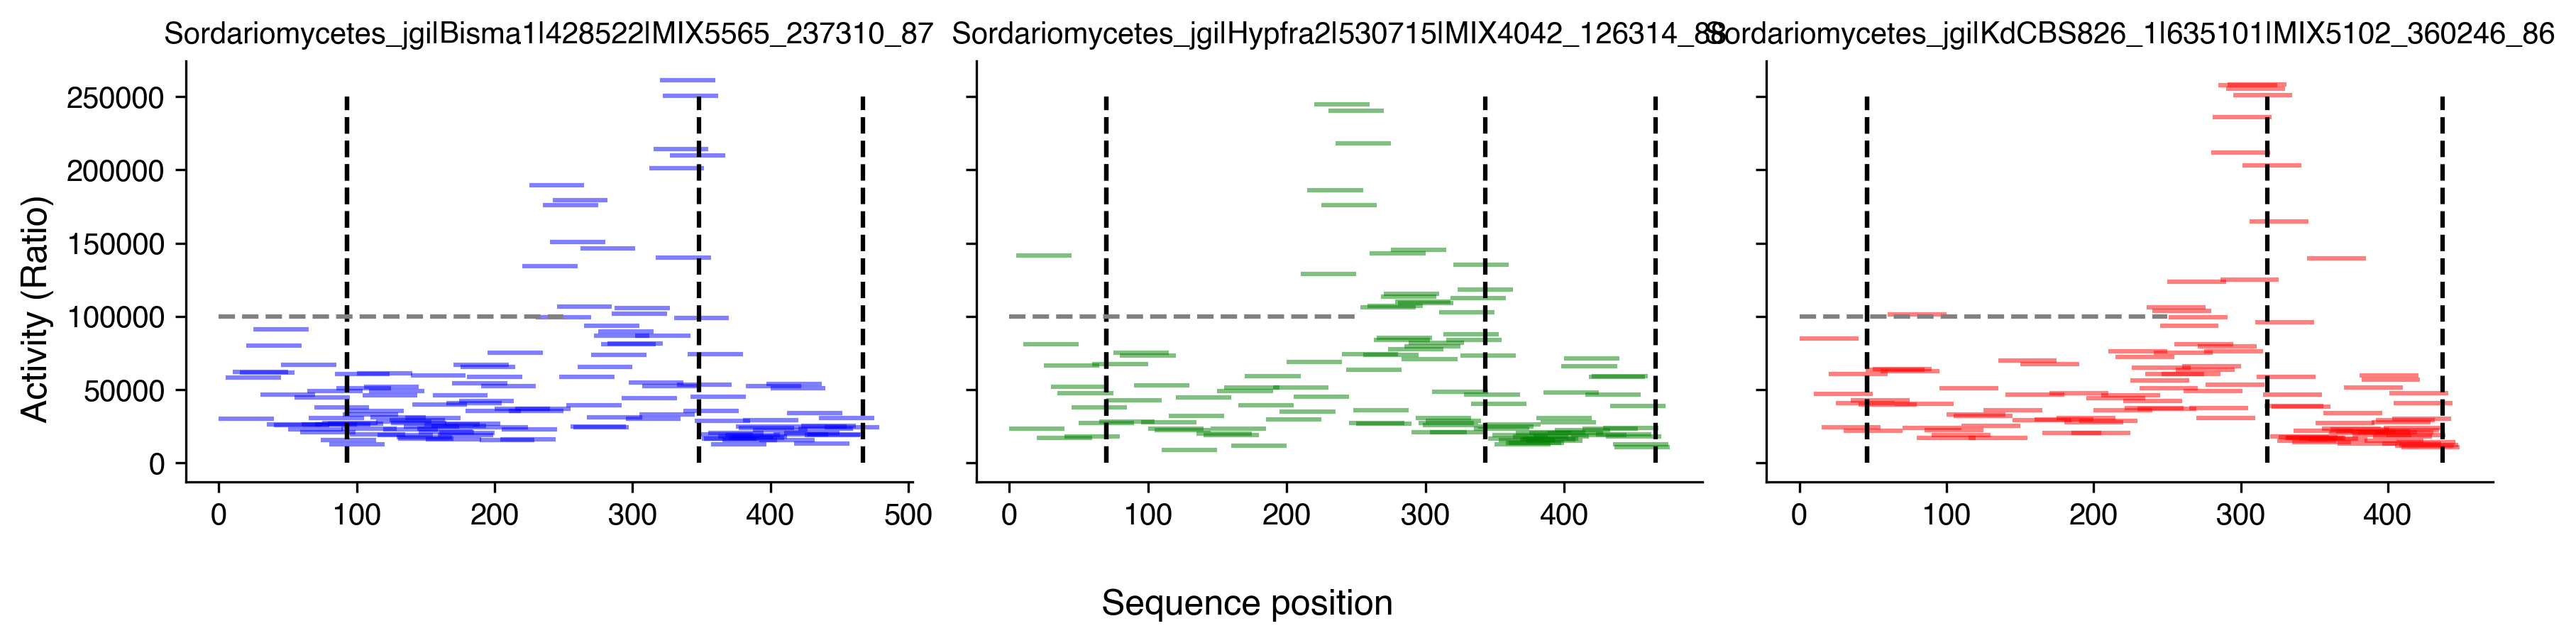

In [39]:
import seaborn as sns

names = [
'Sordariomycetes_jgi|KdCBS826_1|635101|MIX5102_360246_86',
'Sordariomycetes_jgi|Bisma1|428522|MIX5565_237310_87', 
'Sordariomycetes_jgi|Hypfra2|530715|MIX4042_126314_88',
]

filtered = data[[name in names for name in data["SpeciesName"]]]
colors = ['blue', 'green', 'red']

fig, axs = plt.subplots(1, 3, figsize=(12,3), sharey=True)
for j, (idx, color) in enumerate(zip(filtered.index, colors)):
    curr_seq = filtered.loc[idx,"Seq"]

    # This complicated thingy gives us all the tiles that overlap
    curr_overlapping_tiles = seq_data[[seq in curr_seq for seq in seq_data["aa_seq"]]]
    
    # Get the starts of all the overlapping tiles
    curr_overlapping_tiles["start"] = [get_start_end(curr_seq, i)[0] for i in curr_overlapping_tiles['aa_seq']]

    axs[j].set_title(filtered.loc[idx, 'SpeciesName'], fontsize=10)
    sns.despine()

    for i in curr_overlapping_tiles.index:    
        axs[j].hlines(xmin=curr_overlapping_tiles.loc[i, 'start'], xmax=curr_overlapping_tiles.loc[i, 'start'] + 40, y=curr_overlapping_tiles.loc[i, 'ratio'], color=color, alpha=0.5)


    first_W = curr_seq.find("W")
    axs[j].vlines(first_W, ymin=0, ymax=250000, color='black', linestyle='--')
    second_W = curr_seq.find("W", first_W+1)
    axs[j].vlines(second_W, ymin=0, ymax=250000, color='black', linestyle='--')

    third_W = curr_seq.find("W", second_W+1)
    axs[j].vlines(third_W, ymin=0, ymax=250000, color='black', linestyle='--')

    fourth_W = curr_seq.find("W", third_W+1)
    if fourth_W > 0:
        axs[j].vlines(fourth_W, ymin=0, ymax=250000, color='black', linestyle='--')

    fifth_W = curr_seq.find("W", fourth_W+1)
    if fifth_W > 0:
        axs[j].vlines(curr_seq.find("W", fifth_W) , ymin=0, ymax=250000, color='black', linestyle='--')

    # axs[j].vlines(curr_seq.find("MDLQ"), ymin=0, ymax=250000, color='black', linestyle='--')


    axs[j].hlines(100000, xmin=0, xmax=250, color='grey', linestyle='--')

fig.supxlabel("Sequence position")
fig.supylabel("Activity (Ratio)")

fig.tight_layout()

In [40]:
filtered

,SpeciesName,Seq,Length,WxxLF_loc,SmoothedActivites,LinearCharge,LinearHydrophobicityKD,SmoothedActivitesLoess
130,Sordariomycetes_jgi|Bisma1|428522|MIX5565_2373...,MTHTLKGATLRAGLHFPAIPQIALLPACNQYFKIQSPQYNSFPTQL...,479,348,[ 29663.27264143 29663.27264143 29663.272641...,[ 0. 0. 0. 0.2 0.2 0.2 0.2 0.2 0.2 ...,[0. 0. 0.52444444 0.39555556 0...,"[45679.19957344879, 45679.19957344879, 45679.1..."
535,Sordariomycetes_jgi|Hypfra2|530715|MIX4042_126...,MQALKTDRSDKESFDENPDLETVLASSALPLQEDLNFNEAILSSLQ...,476,343,[ 23556.21282181 23556.21282181 23556.212821...,[ 0. 0. 0.2 0.2 0. 0.2 0.2 -0.2 0. ...,[0. 0. 0.50222222 0.44444444 0...,"[73508.82817257795, 73508.82817257795, 73508.8..."
545,Sordariomycetes_jgi|KdCBS826_1|635101|MIX5102_...,MAYPPPPQVELNFEEAIPSFRARSHLSATISPQDFPVFTTDSNQSS...,449,318,[ 84192.4821857 84192.4821857 84192.482185...,[ 0. 0. 0. 0. 0. 0. 0. -0.2 -0.2 ...,[0. 0. 0.48222222 0.40444444 0...,"[64252.84004702941, 64252.84004702941, 64252.8..."


In [52]:
curr_seq = filtered.loc[535,"Seq"]

# This complicated thingy gives us all the tiles that overlap
curr_overlapping_tiles = seq_data[[seq in curr_seq for seq in seq_data["aa_seq"]]]

hypo = curr_overlapping_tiles[curr_overlapping_tiles['aa_seq'].str.contains("LPSDSLISYIPDA")]

In [72]:
curr_seq = filtered.loc[545,"Seq"]

# This complicated thingy gives us all the tiles that overlap
curr_overlapping_tiles = seq_data[[seq in curr_seq for seq in seq_data["aa_seq"]]]

kretz = curr_overlapping_tiles[curr_overlapping_tiles['aa_seq'].str.contains("KFL")]

(array([0., 0., 0., 0., 1., 2., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([     0.,   5000.,  10000.,  15000.,  20000.,  25000.,  30000.,
         35000.,  40000.,  45000.,  50000.,  55000.,  60000.,  65000.,
         70000.,  75000.,  80000.,  85000.,  90000.,  95000., 100000.,
        105000., 110000., 115000., 120000., 125000., 130000., 135000.,
        140000., 145000., 150000., 155000., 160000., 165000., 170000.,
        175000., 180000., 185000., 190000., 195000., 200000., 205000.,
        210000., 215000., 220000., 225000., 230000., 235000., 240000.,
        245000.]),
 <BarContainer object of 49 artists>)

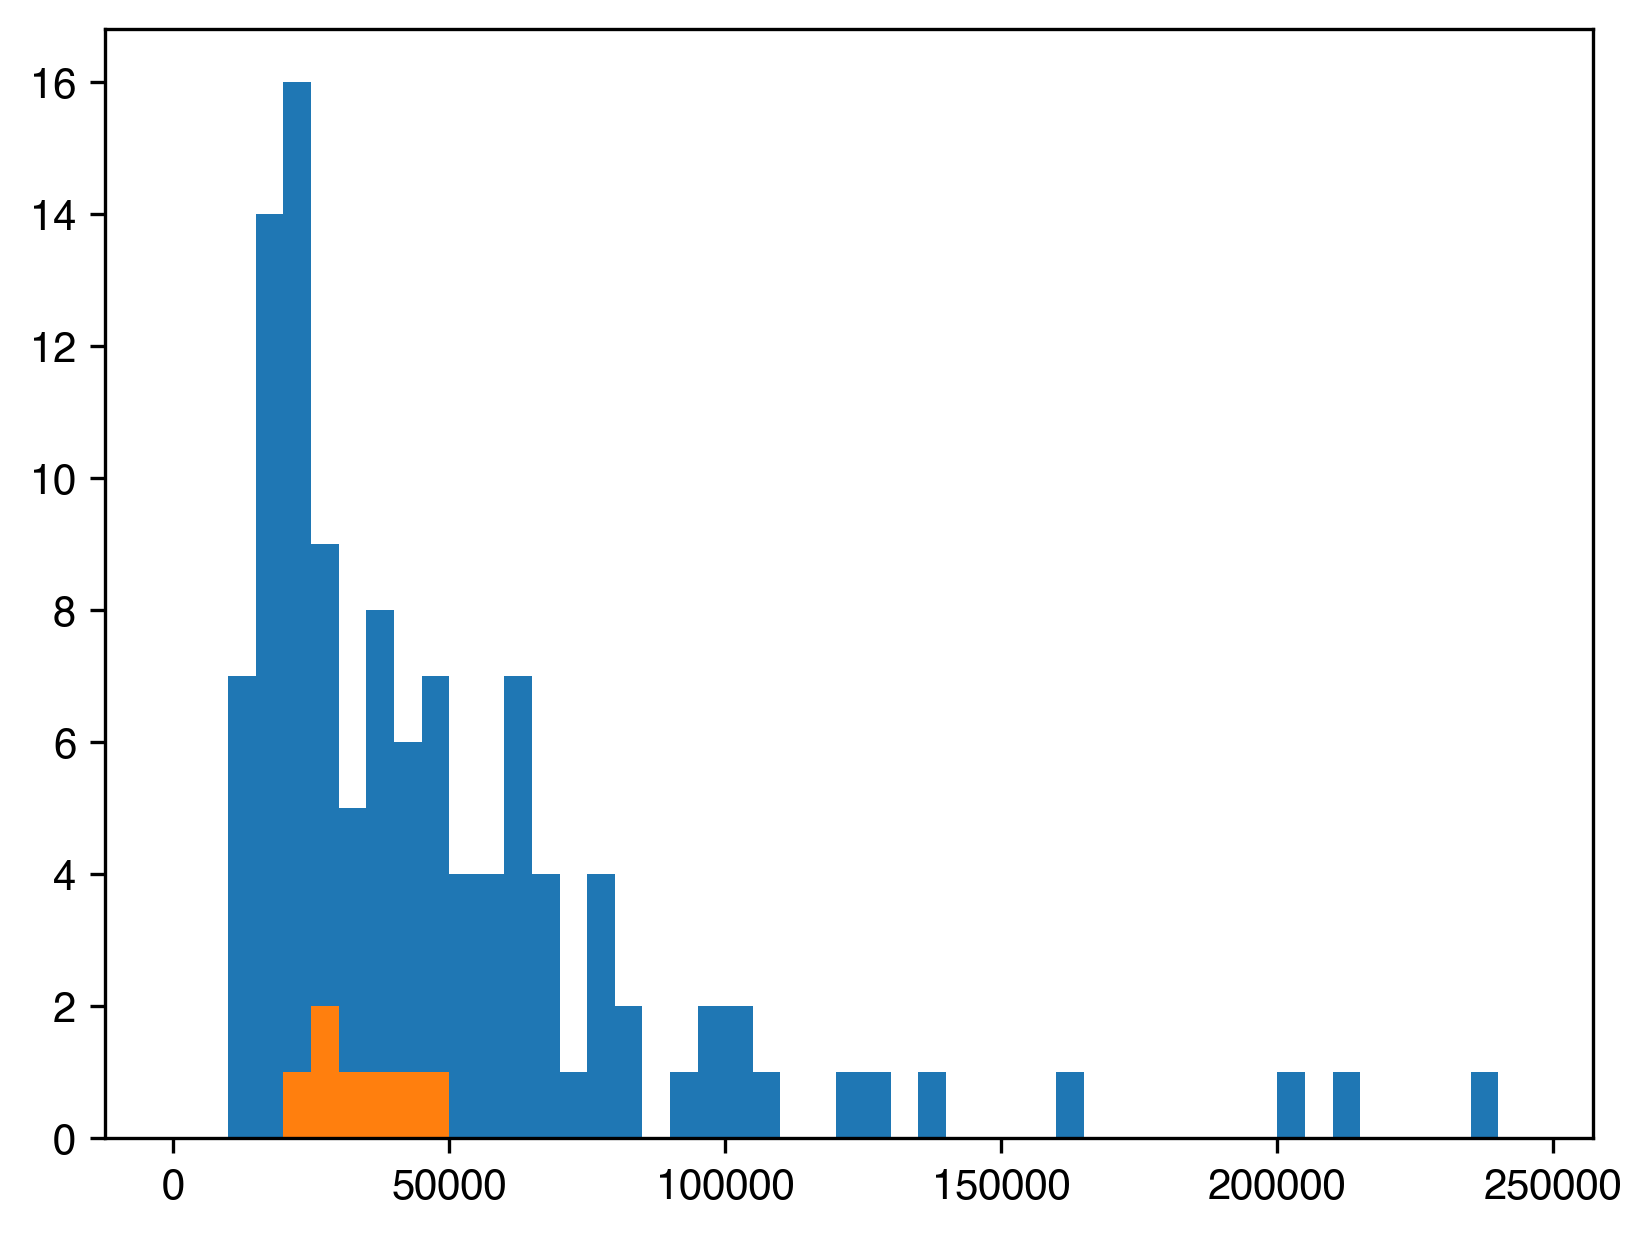

In [75]:
import numpy as np
plt.hist(curr_overlapping_tiles['ratio'], bins=np.arange(0,250000, 5000))
plt.hist(kretz['ratio'], bins=np.arange(0,250000, 5000))

In [65]:
hypo

,aa_seq,activity,abundance,ratio
8359,PLFTNGIGKQQNSANMDLQGISTSTSLPSDSLISYIPDAL,2214.098324,2448.476993,45333.802724
12119,QNSANMDLQGISTSTSLPSDSLISYIPDALSFEDFTPFEG,7612.392353,3731.520934,185957.812163
12695,MDLQGISTSTSLPSDSLISYIPDALSFEDFTPFEGGATTA,6001.846840,806.317874,244553.668968
12835,GIGKQQNSANMDLQGISTSTSLPSDSLISYIPDALSFEDF,3181.777576,3244.353869,128970.566745
13654,ISTSTSLPSDSLISYIPDALSFEDFTPFEGGATTAYSSPG,4739.166264,2199.440025,175716.441660
17276,SLPSDSLISYIPDALSFEDFTPFEGGATTAYSSPGIPGYD,7326.448209,1933.802406,240496.309000


In [67]:
seq_data[seq_data['aa_seq'].str.contains("KFL")]

,aa_seq,activity,abundance,ratio
1910,RPPIPLFSQGIGNQRSPANMDLQGKFLAAPLEENPNLPQS,307.808208,3528.313331,27612.023959
2126,LPTDIIGDGLAVSSGWIHEVSVLSYRCVYCVGFALKFLAE,287.168539,1212.039343,68385.756938
2317,VKFLFSLVLAYGVIVTPLTTVNITSPTNINNLPSYPNPSD,942.131967,1181.942493,42754.903659
3178,PSPFGVKFLFSLVLAYGVIVTPLTTVNITSPTNINNLPSY,285.000000,1024.930817,71748.784104
3663,LFSQGIGNQRSPANMDLQGKFLAAPLEENPNLPQSDAMNS,256.000000,2500.126528,20385.427816
4731,QTRIARPPIPLFSQGIGNQRSPANMDLQGKFLAAPLEENP,285.000000,2788.260007,30540.688137
6030,IGNQRSPANMDLQGKFLAAPLEENPNLPQSDAMNSLEGFT,1459.706486,2774.645661,28549.477514
7976,RLGCSPYFRCDSYFVPSPFGVKFLFSLVLAYGVIVTPLTT,256.000000,415.851220,68037.474033
8160,LLPTDIIGDGLAVSSGWIHEVSVLSYRCVYCVGFALKFLA,320.897969,732.764665,66089.930107
8210,HHTYLVKRKERLGCSPYFRCDSYFVPSPFGVKFLFSLVLA,2666.741619,727.807585,81441.866334


hypo

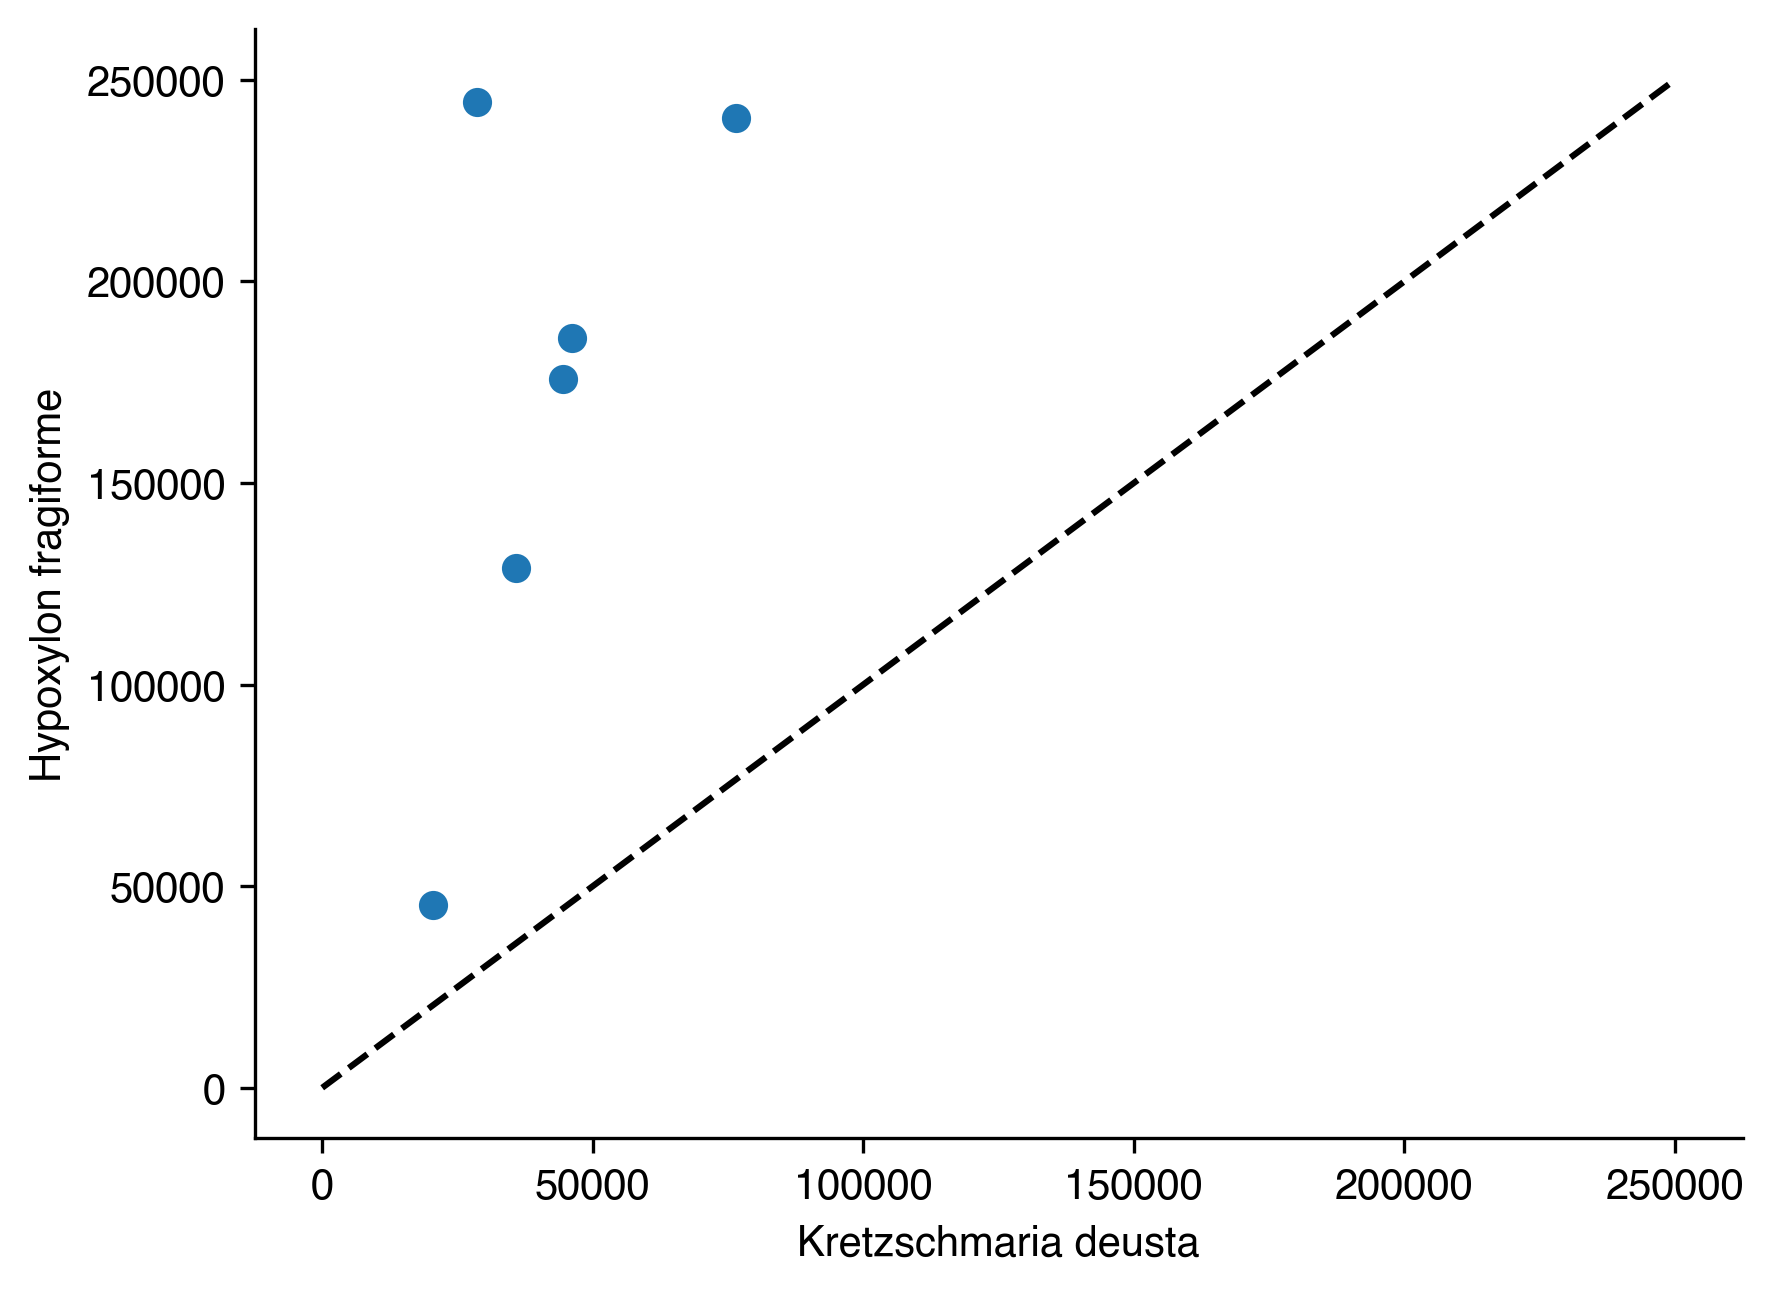

In [63]:
plt.scatter(kretz['ratio'], hypo['ratio'])
plt.plot([0,250000], [0, 250000], color='black', linestyle='--')

plt.xlabel("Kretzschmaria deusta")
plt.ylabel("Hypoxylon fragiforme")

sns.despine()